In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
from itertools import permutations

sns.set_theme()
sns.set(font_scale = 0.9)

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)

In [2]:
df_gns = pd.read_pickle('df_gns.pickle')
df_mar = pd.read_pickle('df_mar.pickle')
df_code = pd.read_pickle('df_code.pickle')
df_gsite = pd.read_pickle('df_gsite.pickle')
df_msite = pd.read_pickle('df_msite.pickle')

# Questions from EDA

### BIO DATA

In [3]:
# sweep number 1A and 1B in Margaree

df_mar.SWEEP_NUMBER.value_counts().loc[sorted(list(df_mar.SWEEP_NUMBER.value_counts().index), key=str)]

0        146
0.5    16974
1      12340
1A       402
1B       627
2       5528
3       3249
4       1551
5        517
6        269
7          9
Name: SWEEP_NUMBER, dtype: int64

In [4]:
# sex only M and U in GNS

df_gns.SEX.value_counts()

U    1437
M     445
Name: SEX, dtype: int64

In [5]:
# scale vs scale

print('GNS')
display(df_gns.AGE_TYPE.value_counts())
print(list(df_gns.AGE_TYPE.unique()))

print('\n\nMARGAREE')
display(df_mar.AGE_TYPE.value_counts())
print(list(df_mar.AGE_TYPE.unique()))

GNS


SCALE     916
SCALE       2
Name: AGE_TYPE, dtype: int64

[nan, 'SCALE', 'SCALE ']


MARGAREE


LGTHFREQ    10290
SCALE        1223
SCALE          35
Name: AGE_TYPE, dtype: int64

['LGTHFREQ', nan, 'SCALE', 'SCALE ']


In [6]:
# MATURITY is almost never used, and always p when it is

display(df_gns.MATURITY.value_counts())
print(df_gns.shape[0])
display(df_mar.MATURITY.value_counts())
print(df_mar.shape[0])

P    23
Name: MATURITY, dtype: int64

12895


P    36
Name: MATURITY, dtype: int64

44472


In [7]:
# River Age

display(df_gns.RIVER_AGE.value_counts())
display(df_mar.RIVER_AGE.value_counts().sort_index())

0.00    4949
1.00    1556
2.00     462
Name: RIVER_AGE, dtype: int64

0.00    13769
1.00    16285
2.00     5620
3.00      138
4.00        1
Name: RIVER_AGE, dtype: int64

In [8]:
# overlapping fish sizes (3 fry sizes)

df_mar.FISH_SIZE.value_counts().sort_index()

FRY       13817
FRY          27
LGPARR     6026
PARR       1799
SMPARR    15049
fry           1
Name: FISH_SIZE, dtype: int64

### CODE DATA

In [9]:
for col in df_code.columns:
    print()
    print(col)
    if df_code[col].nunique()>5:
        display(df_code[col].value_counts().head())
    else:
        display(df_code[col].value_counts())


VIEW_NAME


VU_SEMIR_RIVER               272
VU_SEMIR_SITE                272
VU_SEMIR_BIOLOGICAL          110
VU_SEMIR_SPECIES              53
VU_SEMIR_SITE_MEASUREMENT     35
Name: VIEW_NAME, dtype: int64


ALIAS_NAME


River                    272
Site Data                272
Fish Data                110
Species                   53
Site Measurement Data     35
Name: ALIAS_NAME, dtype: int64


FIELDNAME


MARITIME_RIVER_CODE        396
OLD_MARITIME_RIVER_CODE    138
SPECIES_LIFE_STAGE          79
AIKENHEAD_LEGROW_CODE       53
ELECTROFISHER_TYPE          17
Name: FIELDNAME, dtype: int64


CODE_VALUE


2          6
1          6
847004     4
1113088    4
1102000    4
Name: CODE_VALUE, dtype: int64


LABEL


1113001 - Black Brook         4
1113068 - SUTHERLAND BROOK    4
1103000 - Eel River           4
1102000 - Portage River       4
1115000 - OYSTER RIVER        4
Name: LABEL, dtype: int64


DESCRIPTION


1113016 - Black Brook          4
1113005 - Barnaby River        4
1113007 - Grey Rapids Brook    4
1113008 - Becket Brook         4
1113013 - McKenzie Brook       4
Name: DESCRIPTION, dtype: int64

### SITE DATA

In [10]:
# very many null columns
df_gsite.columns[df_gsite.isna().all()]

Index(['DEPTHA4', 'DEPTHB4', 'DEPTHC4', 'DEPTH_LAYOUT_TYPE', 'AIR_TEMPERATURE',
       'WATER_TEMPERATURE_DEPART', 'TIME_TEMP1', 'WATER_TEMP1', 'TIME_TEMP2',
       'WATER_TEMP2', 'TIME_TEMP3', 'WATER_TEMP3', 'GRADIENT_WATER_HEIGH_UP',
       'GRADIENT_WATER_HEIGH_DOWN', 'GRADIENT_DISTANCE', 'WATER_VEL_TIME',
       'WATER_VEL_DISTANCE', 'WATER_CONDUCTIVITY_RESOLUTION', 'SWEEP0_TIME',
       'SWEEP0_TEMP', 'SWEEP1_TIME', 'SWEEP1_TEMP', 'SWEEP2_TIME',
       'SWEEP2_TEMP', 'SWEEP3_TIME', 'SWEEP3_TEMP', 'SWEEP4_TIME',
       'SWEEP4_TEMP', 'SWEEP5_TIME', 'SWEEP5_TEMP', 'SWEEP6_TIME',
       'SWEEP6_TEMP', 'BARRIER_PRESENT', 'MESH_SIZE', 'BARRIER_COUNT',
       'APRONSEINE', 'APRONSEINE_TYPE', 'SWEEP_COUNT', 'DEPTH_COUNT',
       'WETTED_AREA', 'UNWETTED_AREA', 'CREW_BUCKET', 'CREW_RECORDER',
       'CREW_OTHER1', 'CREW_OTHER2', 'CREW_OTHER3', 'CREW_OTHER4',
       'CREW_OTHER5'],
      dtype='object')

In [11]:
df_msite.columns[df_msite.isna().all()]

Index(['DEPTHA4', 'DEPTHB4', 'DEPTHC4', 'DEPTH_LAYOUT_TYPE', 'TIME_TEMP2',
       'WATER_TEMP2', 'TIME_TEMP3', 'WATER_TEMP3', 'GRADIENT_WATER_HEIGH_UP',
       'GRADIENT_WATER_HEIGH_DOWN', 'GRADIENT_DISTANCE', 'WATER_VEL_TIME',
       'WATER_VEL_DISTANCE', 'SWEEP0_TIME', 'SWEEP0_TEMP', 'BARRIER_PRESENT',
       'MESH_SIZE', 'APRONSEINE', 'APRONSEINE_TYPE', 'SWEEP_COUNT',
       'DEPTH_COUNT', 'WETTED_AREA', 'UNWETTED_AREA', 'CREW_RECORDER',
       'CREW_OTHER2', 'CREW_OTHER3', 'CREW_OTHER4', 'CREW_OTHER5'],
      dtype='object')

In [12]:
# ELECTROFISHER_TYPE labels
df_msite.ELECTROFISHER_TYPE.value_counts()

LR24     89
LR 24    20
Name: ELECTROFISHER_TYPE, dtype: int64

In [13]:
# huge currents sometimes
print('MARGAREE')
display(df_msite.ELECTROFISHER_CURRENT.value_counts().sort_index(ascending=False).head())
print()
print('GNS')
display(df_gsite.ELECTROFISHER_CURRENT.value_counts().sort_index(ascending=False).head())

MARGAREE


250.00    1
46.22     1
3.55      1
2.65      1
1.90      1
Name: ELECTROFISHER_CURRENT, dtype: int64


GNS


0.50    1
0.40    2
0.35    1
0.35    1
0.33    1
Name: ELECTROFISHER_CURRENT, dtype: int64

In [14]:
# so many rocks
[x for x in df_gsite.columns.sort_values() if 'SUB_' in x]

['FLAG_SUB_TYPE_BEDROCK',
 'FLAG_SUB_TYPE_BOULDER',
 'FLAG_SUB_TYPE_COBBLE',
 'FLAG_SUB_TYPE_FINES',
 'FLAG_SUB_TYPE_GRAVEL',
 'FLAG_SUB_TYPE_PEBBLE',
 'FLAG_SUB_TYPE_ROCKS',
 'FLAG_SUB_TYPE_SAND',
 'SUB_TYPE_BEDROCK',
 'SUB_TYPE_BOULDER',
 'SUB_TYPE_COBBLE',
 'SUB_TYPE_FINES',
 'SUB_TYPE_GRAVEL',
 'SUB_TYPE_PEBBLE',
 'SUB_TYPE_ROCKS',
 'SUB_TYPE_SAND']

In [15]:
# one outlier LENGTH_RIGHT_BANK
df_gsite.LENGTH_RIGHT_BANK.value_counts().sort_index(ascending=False)

194.00    1
36.60     1
31.10     1
29.70     1
28.80     1
         ..
6.00      2
5.00      1
4.20      1
4.00      1
3.40      1
Name: LENGTH_RIGHT_BANK, Length: 130, dtype: int64

In [16]:
# that can't be right...
df_msite.WATER_PH.value_counts().sort_index(ascending=False).head()

11.90    1
8.60     1
8.40     1
8.20     2
8.10     1
Name: WATER_PH, dtype: int64

In [17]:
# weather notes don't seem to follow any format
display(df_msite.WEATHER.value_counts())
display(df_gsite.WEATHER.value_counts())

sun                  51
overcast             14
Sunny                10
cloud                 6
rain                  6
sun/cloud             5
cloud/sun             4
overcast/sun          4
Overcast              3
showers               2
cloud/showers         1
fog/sun               1
cloud/rain            1
sun/showers           1
Sunny & hot           1
cloud                 1
Cloudy with Sunny     1
Name: WEATHER, dtype: int64

overcast, warm            1
sun, clouds               1
overcast, sunny breaks    1
Name: WEATHER, dtype: int64

# Flag Outliers

In [18]:
def create_stats(dataframe, drop_columns=list()):
    stats_dataframe = dataframe.loc[:, (dataframe.dtypes == 'int64') | (dataframe.dtypes == 'float64')].drop(drop_columns, axis=1).describe(percentiles=[.005, .25, .75, .995]).T
    stats_dataframe['IQR'] = stats_dataframe['75%'] - stats_dataframe['25%']
    stats_dataframe = stats_dataframe.rename({'mean':'avg', '0.5%':'stdev_n3', '50%':'median', '99.5%':'stdev_3'}, axis=1)[['avg', 'median', 'std', 'IQR', 'stdev_n3', 'stdev_3']]
    return stats_dataframe

def flag_outliers(dataframe, stats_dataframe):
    for feature, values in stats_dataframe.iterrows():
        if stats_dataframe.loc[feature].IQR != 0:
            dataframe.loc[dataframe[feature] < stats_dataframe.loc[feature].avg - stats_dataframe.loc[feature].IQR*1.5, ['outlier', f'outlier_{feature}']] = True, 'low'
            dataframe.loc[dataframe[feature] > stats_dataframe.loc[feature].avg + stats_dataframe.loc[feature].IQR*1.5, ['outlier', f'outlier_{feature}']] = True, 'high'
        dataframe.loc[dataframe[feature] < stats_dataframe.loc[feature].stdev_n3, ['outlier', f'outlier_{feature}']] = True, 'low'
        dataframe.loc[dataframe[feature] > stats_dataframe.loc[feature].stdev_3, ['outlier', f'outlier_{feature}']] = True, 'high'
        if dataframe[f'outlier_{feature}'].notnull().sum() == 0:
            dataframe = dataframe.drop(f'outlier_{feature}', axis=1)
    return dataframe

def print_outlier_info(dataframe):
    for col in [x for x in dataframe.columns if 'outlier_' in x]:
        feature = col.replace('outlier_', '')
        temp = dataframe.groupby(f'outlier_{feature}', dropna=False)[[feature]].agg(['mean', 'min', 'max', 'count'])
        temp.index = temp.index.fillna('normal')
        display(temp)
        print()

### GNS BIO DATA

In [19]:
df_gns_stats =  create_stats(df_gns, ['TOTAL_LENGTH', 'ID', 'YEAR'])
df_gns = flag_outliers(df_gns, df_gns_stats)
df_gns_stats

,avg,median,std,IQR,stdev_n3,stdev_3
SWEEP_NUMBER,0.50,0.50,0.00,0.00,0.50,0.50
FORK_LENGTH,66.19,59.00,21.40,22.00,33.00,143.12
WEIGHT,4.27,2.24,6.05,2.96,0.44,31.91
CATCH_FREQUENCY,1.16,1.00,3.29,0.00,1.00,1.00
RIVER_AGE,0.36,0.00,0.60,1.00,0.00,2.00
WT_BIN,3.77,2.00,5.82,3.00,0.00,31.00


In [20]:
print_outlier_info(df_gns)
# questions
## do weight and length outliers overlap? check weight/length ratio outliers = more useful

FORK_LENGTH                     
                           mean    min    max  count
outlier_FORK_LENGTH                                 
high                     115.46 100.00 552.00   1098
low                       29.45  13.50  33.00     75
normal                    61.76  34.00  99.00  11603

WEIGHT                   
                 mean  min    max  count
outlier_WEIGHT                          
high            15.19 8.72 161.80   1633
low              0.30 0.08   0.43     61
normal           2.67 0.44   8.71  10956

CATCH_FREQUENCY                
                                   mean min  max  count
outlier_CATCH_FREQUENCY                                
high                              32.58   2  163     64
normal                             1.00   1    1  12831

RIVER_AGE                
                       mean  min  max count
outlier_RIVER_AGE                          
high                   2.00 2.00 2.00   462
normal                 0.24 0.00 1.00  6505

WT_BIN                   
                 mean  min    max  count
outlier_WT_BIN                          
high            14.96 9.00 100.00   1549
normal           2.21 0.00   8.00  11101

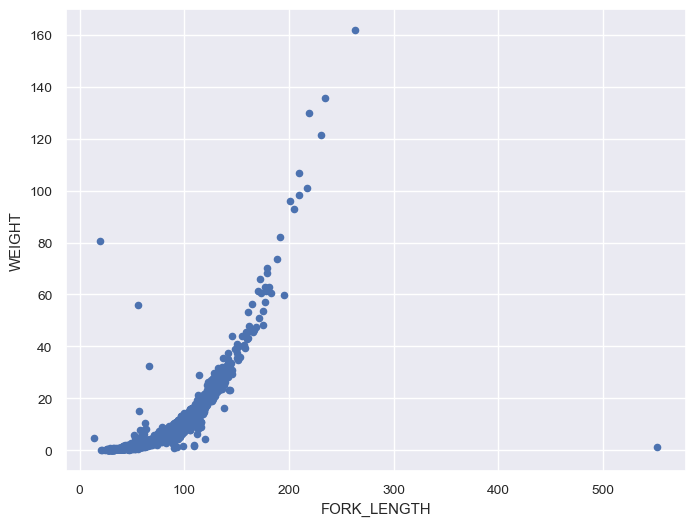

In [21]:
# first plot including outliers
df_gns.plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

In [22]:
# fork_length outlier is a data error
df_gns[df_gns.FORK_LENGTH>500][['WEIGHT', 'FORK_LENGTH']]

,WEIGHT,FORK_LENGTH
3802,1.45,552.00


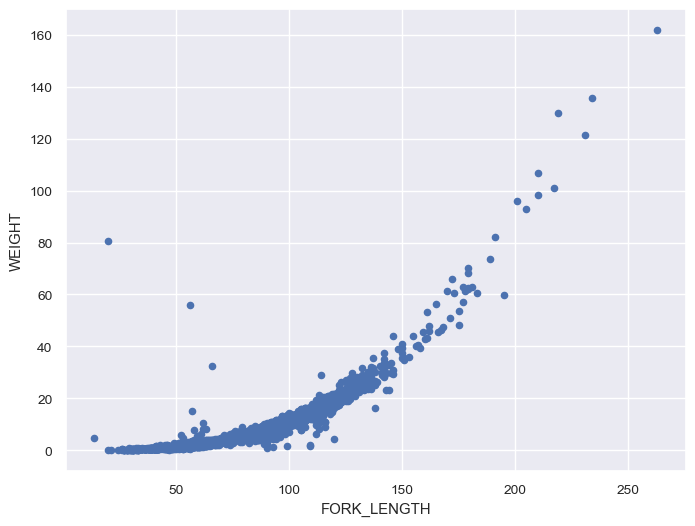

In [23]:
# still a few data errors
df_gns[df_gns.FORK_LENGTH<500].plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

### MARGAREE BIO DATA

In [24]:
df_mar_stats =  create_stats(df_mar, ['ID', 'YEAR', 'SPECIES_ITIS_CODE'])
df_mar = flag_outliers(df_mar, df_mar_stats)
df_mar_stats

,avg,median,std,IQR,stdev_n3,stdev_3
TOTAL_LENGTH,76.49,82.00,43.50,57.00,1.00,187.00
WEIGHT,6.61,4.02,73.85,6.82,0.30,33.50
CATCH_FREQUENCY,2.86,1.00,11.73,0.00,1.00,73.00
RIVER_AGE,0.78,1.00,0.71,1.00,0.00,2.00
WT_BIN,5.65,4.00,6.53,7.00,0.00,33.00


In [25]:
print_outlier_info(df_mar)
# questions
## length width outliers? (as above)

TOTAL_LENGTH                    
                             mean    min    max count
outlier_TOTAL_LENGTH                                 
high                       185.75 162.00 318.00    92
normal                      74.73   1.00 161.00  5730

WEIGHT                      
                 mean   min      max  count
outlier_WEIGHT                             
high            31.67 16.84 11600.00   1478
low              0.24  0.11     0.29    113
normal           5.04  0.30    16.81  23251

CATCH_FREQUENCY                    
                                   mean   min    max  count
outlier_CATCH_FREQUENCY                                    
high                             128.17 74.00 581.00    220
normal                             2.24  1.00  73.00  44245

RIVER_AGE                 
                       mean  min  max  count
outlier_RIVER_AGE                           
high                   3.01 3.00 4.00    139
normal                 0.77 0.00 2.00  35674

WT_BIN                    
                 mean   min    max  count
outlier_WT_BIN                           
high            23.54 17.00 100.00   1440
normal           4.55  0.00  16.00  23402

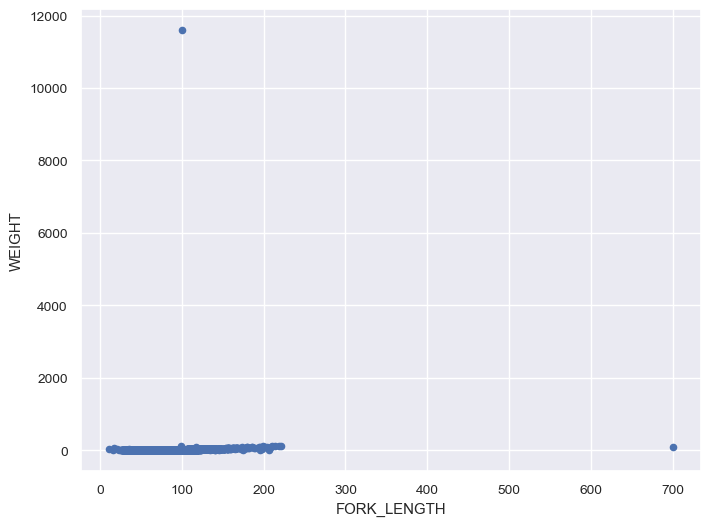

In [26]:
# first plot including outliers
df_mar.plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

In [27]:
# weight data error
df_mar[df_mar.WEIGHT>10000][['WEIGHT', 'FORK_LENGTH']]

,WEIGHT,FORK_LENGTH
12689,11600.00,100


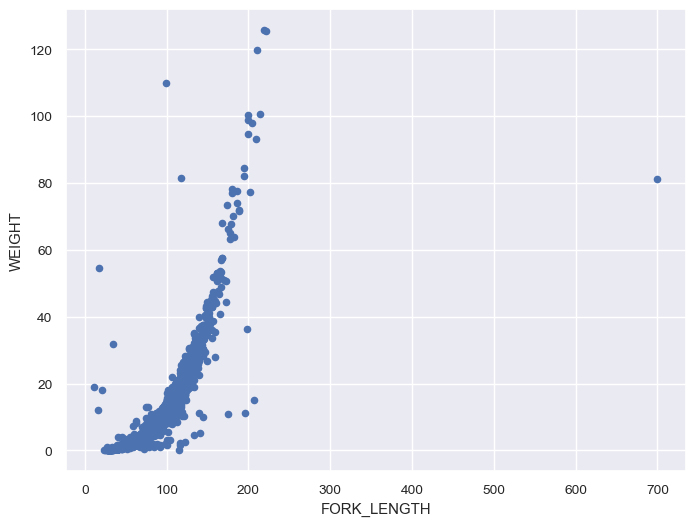

In [28]:
# is the length outlier also an error? (yes)
df_mar[df_mar.WEIGHT<1000].plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

In [29]:
# fork length data error
df_mar[df_mar.FORK_LENGTH>600][['WEIGHT', 'FORK_LENGTH']]

,WEIGHT,FORK_LENGTH
41228,81.19,700


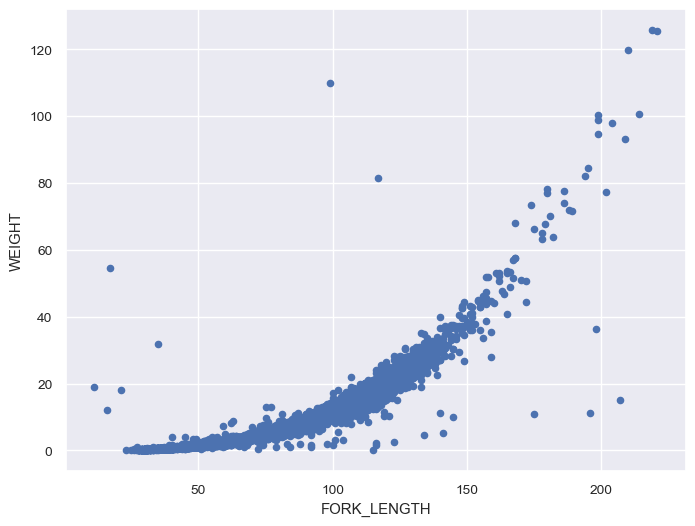

In [30]:
# check the plot excluding both obvious data errors
df_mar[(df_mar.WEIGHT<1000)&(df_mar.FORK_LENGTH<500)].plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

# some of these still look like data errors

### CODES

In [31]:
# no numerical data to check for outliers
df_code.dtypes

VIEW_NAME      object
ALIAS_NAME     object
FIELDNAME      object
CODE_VALUE     object
LABEL          object
DESCRIPTION    object
dtype: object

In [32]:
# let's check the least common entries, look for typos (none obvious)
## probably some cleanup possible, but nothing obvious
for col in df_code.columns:
    print()
    print(col)
    if df_code[col].nunique()>5:
        display(df_code[col].value_counts().tail())
    else:
        display(df_code[col].value_counts())


VIEW_NAME


VU_SEMIR_RIVER               272
VU_SEMIR_SITE                272
VU_SEMIR_BIOLOGICAL          110
VU_SEMIR_SPECIES              53
VU_SEMIR_SITE_MEASUREMENT     35
Name: VIEW_NAME, dtype: int64


ALIAS_NAME


River                    272
Site Data                272
Fish Data                110
Species                   53
Site Measurement Data     35
Name: ALIAS_NAME, dtype: int64


FIELDNAME


ORIGIN               3
DEPTH_LAYOUT_TYPE    3
FILE_TYPE            2
AGE_TYPE             2
APRONSEINE_TYPE      2
Name: FIELDNAME, dtype: int64


CODE_VALUE


8250    1
8260    1
8870    1
8940    1
907     1
Name: CODE_VALUE, dtype: int64


LABEL


unknown vertebrates           1
Salamanders                   1
Appalachian brook crayfish    1
Adipose clip or hatchery      1
FLOUNDER,WINDOWPANE           1
Name: LABEL, dtype: int64


DESCRIPTION


winter flounder                                                            1
windowpane flounderLeft-eyed flounder                                      1
unknown vertebratesNot ID'ed in field                                      1
Salamanders. Common in smaller tributaries. Life Stage Code = ITIS code    1
SCOPHTHALMUS (LOPHOPSETTA) AQUOSUS                                         1
Name: DESCRIPTION, dtype: int64

### GNS SITES

In [33]:
df_gsite_stats = create_stats(df_gsite, ['ID'])
df_gsite_stats = df_gsite_stats.dropna()
df_gsite = flag_outliers(df_gsite, df_gsite_stats)

In [34]:
print_outlier_info(df_gsite)

TOS3                  
              mean   min   max count
outlier_TOS3                        
high         60.00 60.00 60.00     1
normal        1.84  0.00 30.00   196

TOS4                  
              mean   min   max count
outlier_TOS4                        
high         30.00 30.00 30.00     1
normal        0.20  0.00 20.00   196

LENGTH_LEFT_BANK                  
                                     mean   min   max count
outlier_LENGTH_LEFT_BANK                                   
high                                27.56 24.10 33.60    11
low                                  5.08  3.50  6.30     6
normal                              14.90  7.60 23.50   221

LENGTH_RIGHT_BANK                   
                                       mean   min    max count
outlier_LENGTH_RIGHT_BANK                                     
high                                  49.83 25.40 194.00     8
low                                    4.77  3.40   6.00     6
normal                                14.90  6.70  24.60   224

WIDTH_LOWER                  
                           mean   min   max count
outlier_WIDTH_LOWER                              
high                      15.39 13.00 22.00    14
low                        2.10  2.00  2.20     2
normal                     6.51  2.30 12.80   221

WIDTH_MIDDLE                  
                             mean   min   max count
outlier_WIDTH_MIDDLE                               
high                        16.29 12.80 20.50     9
low                          2.40  2.20  2.60     2
normal                       6.48  2.70 12.50   191

WIDTH_UPPER                  
                           mean   min   max count
outlier_WIDTH_UPPER                              
high                      16.66 14.20 20.50    11
low                        2.20  2.10  2.30     2
normal                     6.89  2.40 13.50   225

FULL_WETTED_WIDTH                    
                                       mean    min    max count
outlier_FULL_WETTED_WIDTH                                      
high                                 202.99 202.99 202.99     1
low                                   33.07  33.07  33.07     1
normal                                88.96  38.83 150.00    91

DEPTHA1                  
                   mean   min   max count
outlier_DEPTHA1                          
high              53.50 43.00 75.00    10
low                3.00  3.00  3.00     1
normal            17.73  4.00 40.00   190

DEPTHA2                  
                   mean   min   max count
outlier_DEPTHA2                          
high              53.86 48.00 68.00     7
low                2.00  2.00  2.00     1
normal            21.11  3.00 46.00   193

DEPTHA3                  
                   mean   min   max count
outlier_DEPTHA3                          
high              51.46 43.00 75.00    13
low                1.00  1.00  1.00     1
normal            17.97  2.00 42.00   187

DEPTHB1                  
                   mean   min   max count
outlier_DEPTHB1                          
high              45.20 37.00 64.00    10
low                3.00  3.00  3.00     1
normal            17.53  4.00 36.00   187

DEPTHB2                  
                   mean   min   max count
outlier_DEPTHB2                          
high              47.00 39.00 67.00     7
low                3.00  3.00  3.00     1
normal            19.76  4.00 38.00   190

DEPTHB3                  
                   mean   min   max count
outlier_DEPTHB3                          
high              48.60 42.00 64.00    10
normal            18.28  2.00 38.00   188

DEPTHC1                  
                   mean   min   max count
outlier_DEPTHC1                          
high              44.70 38.00 57.00    10
low                3.00  3.00  3.00     1
normal            16.40  4.00 37.00   189

DEPTHC2                  
                   mean   min   max count
outlier_DEPTHC2                          
high              44.44 40.00 49.00     9
normal            18.89  5.00 38.00   191

DEPTHC3                  
                   mean   min   max count
outlier_DEPTHC3                          
high              44.50 41.00 54.00     8
normal            17.95  5.00 40.00   192

DEPTH_MAX                  
                       mean   min   max count
outlier_DEPTH_MAX                            
high                  60.50 53.00 76.00     4
low                   13.00 13.00 13.00     1
normal                32.07 15.00 52.00   122

WATER_TEMPERATURE_ARRIVAL                  
                                                       mean   min   max count
outlier_WATER_TEMPERATURE_ARRIVAL                                            
high                                                  19.10 18.60 19.90     4
low                                                    7.96  7.20  8.30    13
normal                                                13.75  8.80 18.20   172

WATER_PH                
                     mean  min  max count
outlier_WATER_PH                         
high                 9.07 9.07 9.07     1
low                  6.83 6.77 6.90     2
normal               8.04 7.38 8.83    22

WATER_CONDUCTIVITY                    
                                         mean    min    max count
outlier_WATER_CONDUCTIVITY                                       
high                                   228.60 144.00 372.00    19
low                                     17.20  17.20  17.20     1
normal                                  58.59  19.30 143.70   170

SUB_TYPE_FINES                  
                                 mean   min   max count
outlier_SUB_TYPE_FINES                                 
high                            15.00 15.00 15.00     1
normal                           0.54  0.00 10.00   239

SUB_TYPE_SAND                  
                               mean   min   max count
outlier_SUB_TYPE_SAND                                
high                          19.83 13.00 30.00    12
normal                         2.80  0.00 10.00   228

SUB_TYPE_GRAVEL                  
                                   mean   min   max count
outlier_SUB_TYPE_GRAVEL                                  
high                              43.33 40.00 50.00     3
normal                            12.23  0.00 35.00   237

SUB_TYPE_PEBBLE                  
                                   mean   min   max count
outlier_SUB_TYPE_PEBBLE                                  
high                              64.17 60.00 70.00    12
low                                4.00  4.00  4.00     1
normal                            28.03  5.00 50.00   227

SUB_TYPE_COBBLE                  
                                   mean   min   max count
outlier_SUB_TYPE_COBBLE                                  
high                              72.50 70.00 80.00     8
low                                5.00  5.00  5.00     4
normal                            36.40 10.00 65.00   227

SUB_TYPE_ROCKS                  
                                 mean   min   max count
outlier_SUB_TYPE_ROCKS                                 
high                            35.33 30.00 60.00    15
normal                           9.04  0.00 25.00   225

SUB_TYPE_BOULDER                  
                                     mean   min   max count
outlier_SUB_TYPE_BOULDER                                   
high                                20.00 15.00 30.00    15
normal                               2.23  0.00 10.00   225

SUB_TYPE_BEDROCK                  
                                     mean   min   max count
outlier_SUB_TYPE_BEDROCK                                   
high                                70.00 70.00 70.00     1
normal                               2.01  0.00 60.00   239

MAX_OVERHANG_L_BK                 
                                       mean  min   max count
outlier_MAX_OVERHANG_L_BK                                   
high                                   7.14 6.00 11.00    10
normal                                 1.32 0.00  5.50   188

MAX_OVERHANG_R_BK                
                                       mean  min  max count
outlier_MAX_OVERHANG_R_BK                                  
high                                   7.10 6.20 8.00     6
normal                                 1.44 0.00 6.00   190

SWEEP0_5_TIME                     
                               mean    min     max count
outlier_SWEEP0_5_TIME                                   
high                         838.80 690.00 1739.00    20
low                          322.86 102.00  409.00    21
normal                       539.48 423.00  680.00   197

SWEEP0_5_TEMP                  
                               mean   min   max count
outlier_SWEEP0_5_TEMP                                
high                          22.27 21.70 23.10     3
low                            6.80  6.80  6.80     1
normal                        14.10  9.40 18.10    43

ELECTROFISHER_CURRENT                
                                               mean  min  max count
outlier_ELECTROFISHER_CURRENT                                      
high                                           0.50 0.50 0.50     1
low                                            0.10 0.10 0.10     1
normal                                         0.25 0.12 0.40    15

ELECTROFISHER_VOLTAGE                    
                                               mean    min    max count
outlier_ELECTROFISHER_VOLTAGE                                          
high                                         550.00 500.00 600.00    13
low                                          230.00 200.00 250.00    10
normal                                       364.48 275.00 475.00   105

### TOS feature comparison

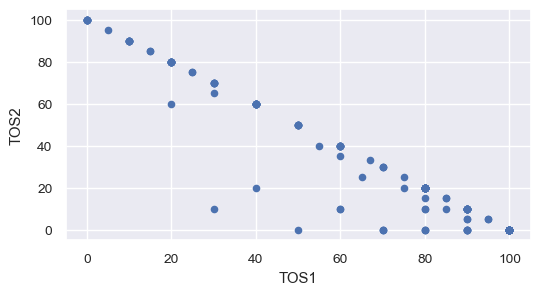

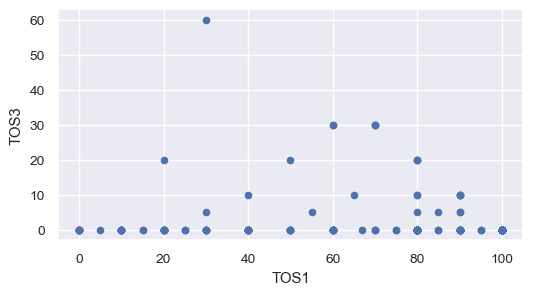

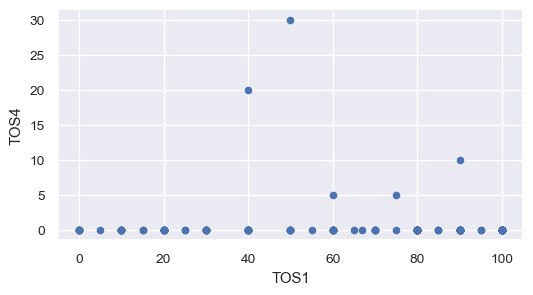

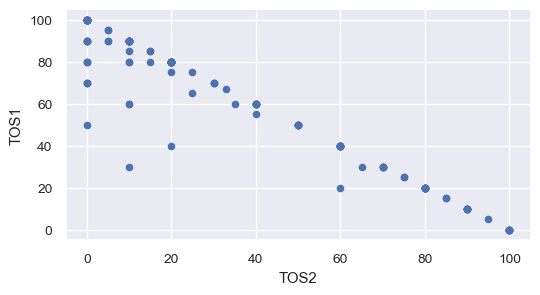

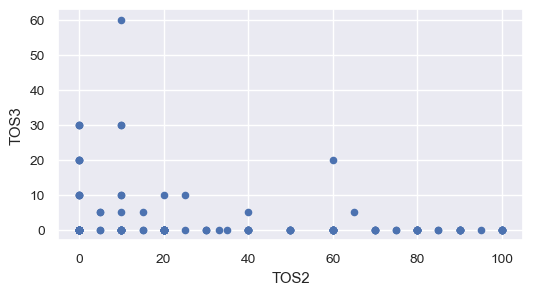

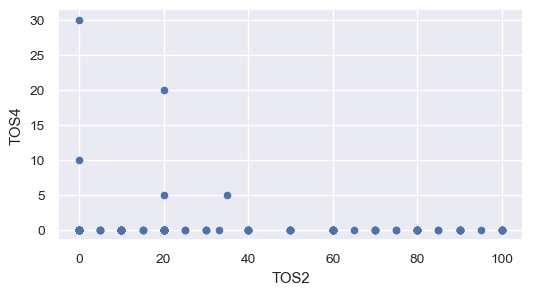

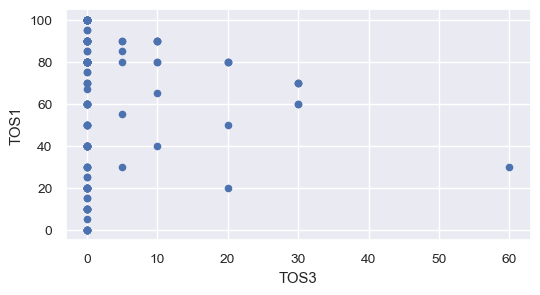

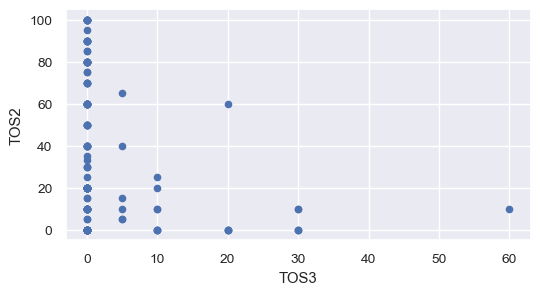

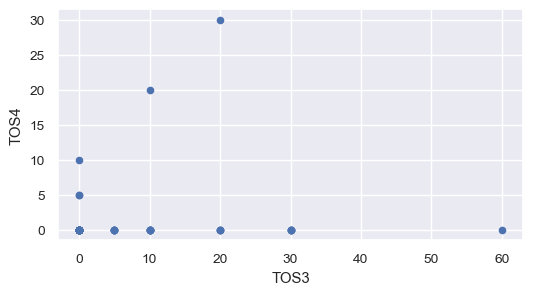

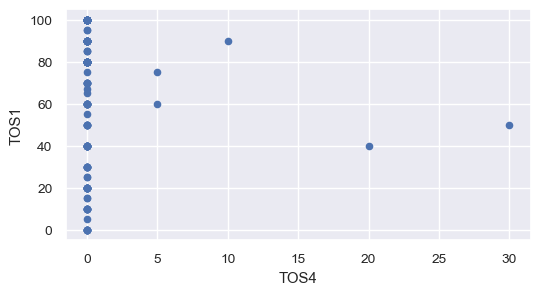

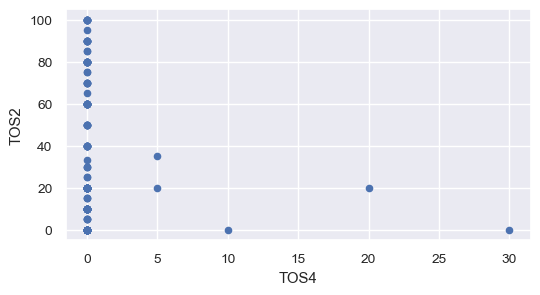

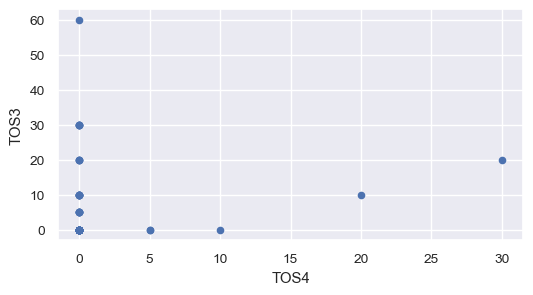

In [35]:
features = ['TOS1', 'TOS2', 'TOS3', 'TOS4']
for x, y in permutations(features, 2):
    df_gsite.plot(kind='scatter', x=x, y=y, figsize=(6,3));

### DEPTH feature comparison (nothing sticks out)

In [36]:
depth_features = [
    'DEPTHA1', 'DEPTHA2', 'DEPTHA3', 'DEPTHA4', 
    'DEPTHB1', 'DEPTHB2', 'DEPTHB3', 'DEPTHB4', 
    'DEPTHC1', 'DEPTHC2', 'DEPTHC3', 'DEPTHC4', 
    'DEPTH_MAX'
]
# too many for all comparisons
len(list(permutations(depth_features, 2))) 

156

In [37]:
# common range for plots
df_gsite[depth_features].max().max()

76.0


Comparing Depth A




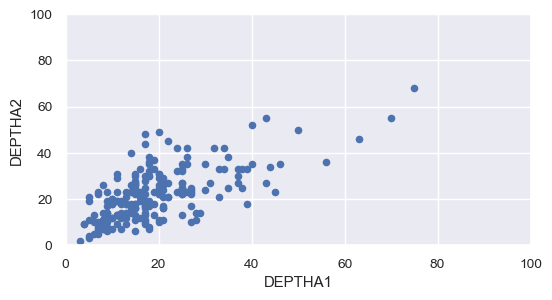

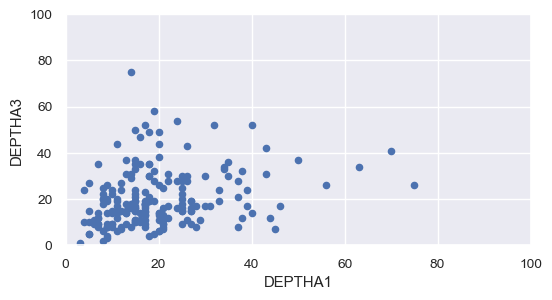

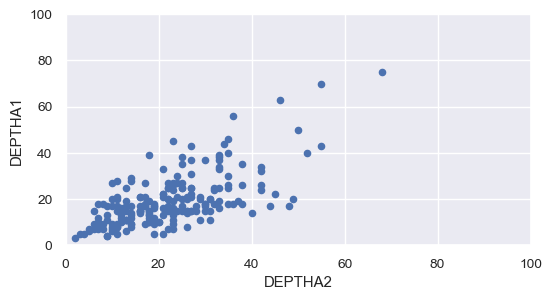

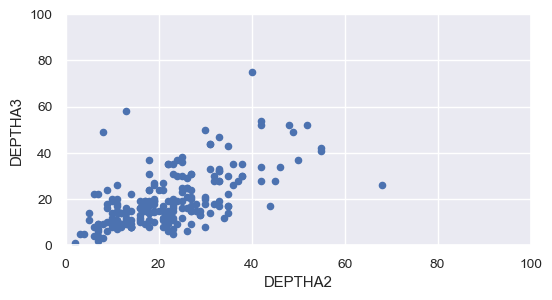

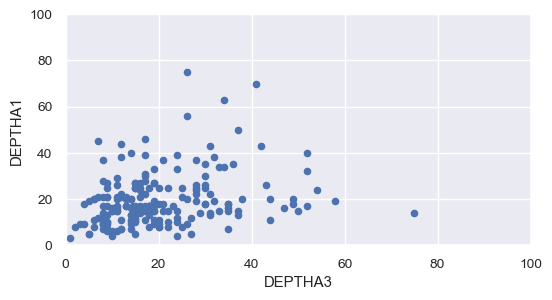

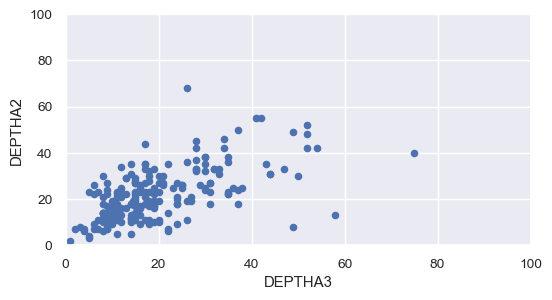


Comparing Depth B




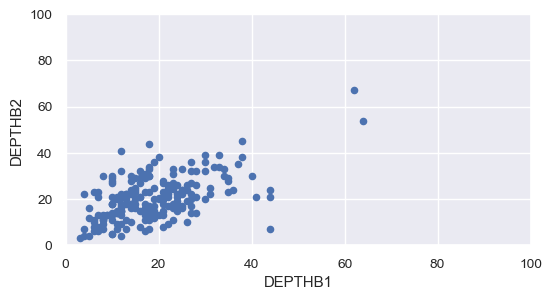

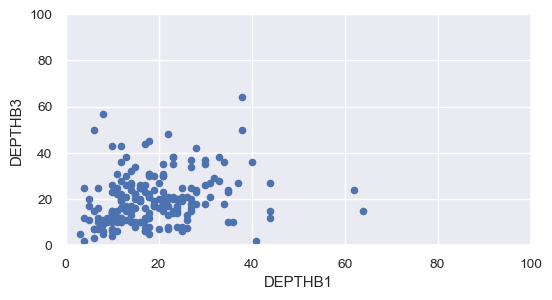

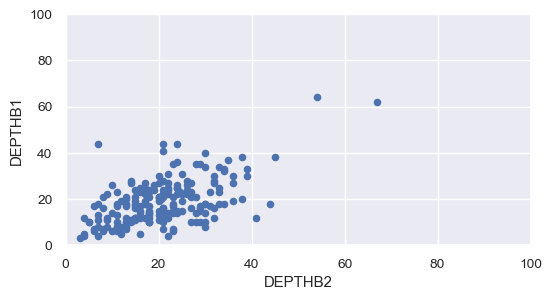

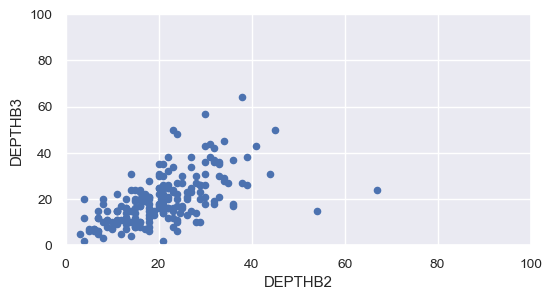

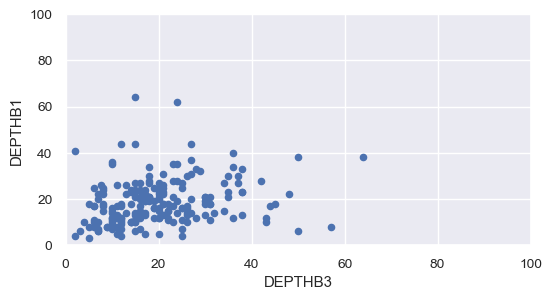

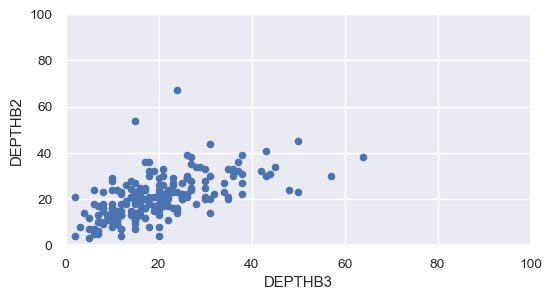


Comparing Depth C




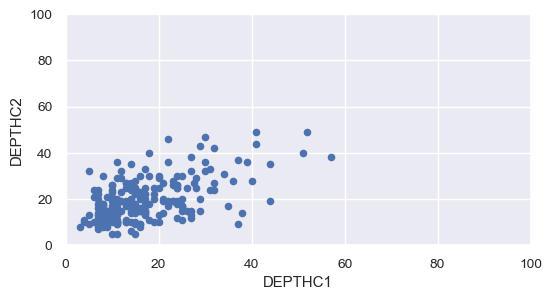

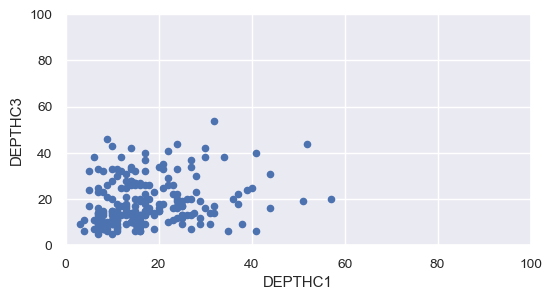

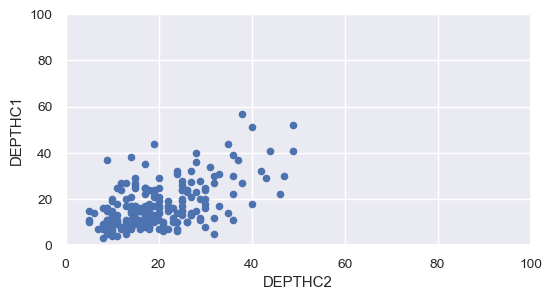

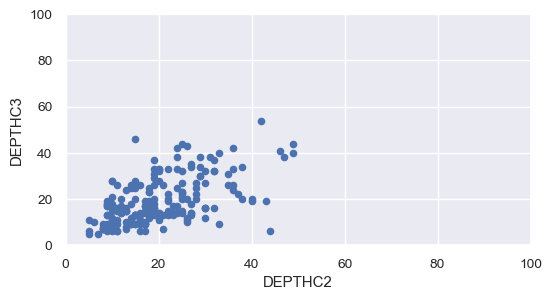

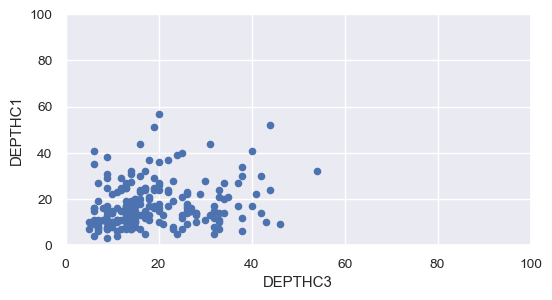

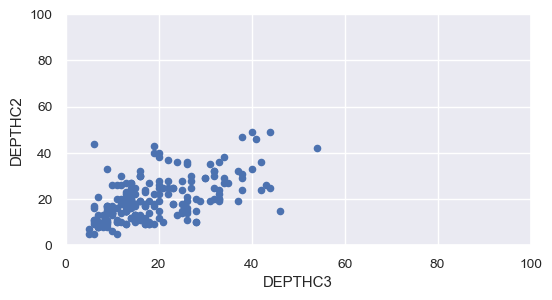

In [38]:
# depth L comparison
limits = (0, df_gsite[features].max().max())
for L in ['A', 'B', 'C']:
    print(f'\nComparing Depth {L}\n\n')
    features = [f'DEPTH{L}1', f'DEPTH{L}2', f'DEPTH{L}3', f'DEPTH{L}4']
    for x, y in permutations(features, 2):
        if df_gsite.dropna(subset=[x, y]).shape[0]:
            df_gsite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()


Comparing Depth 1




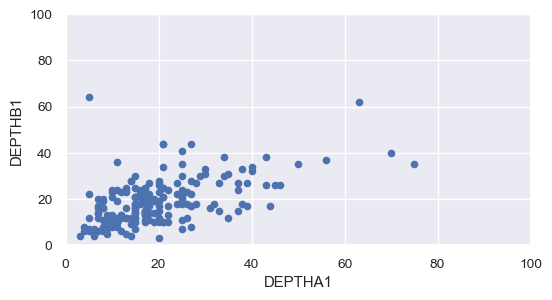

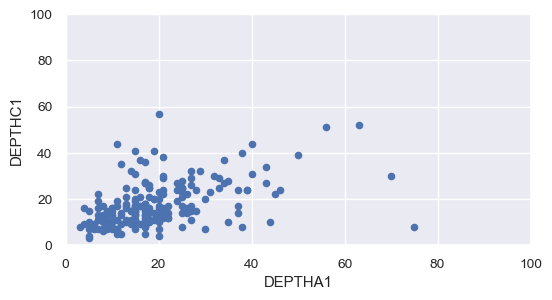

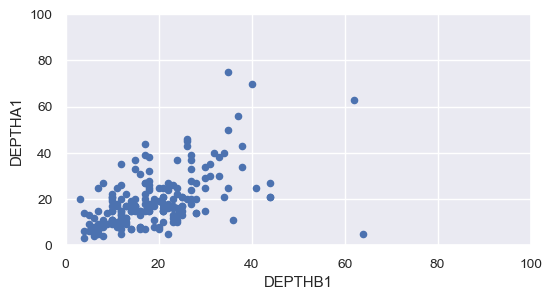

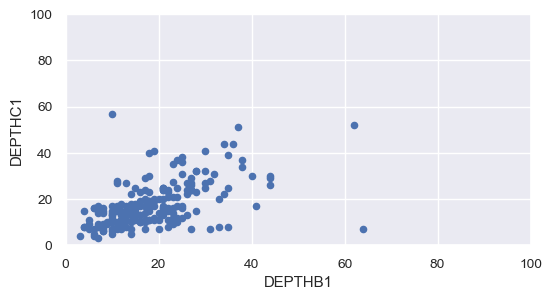

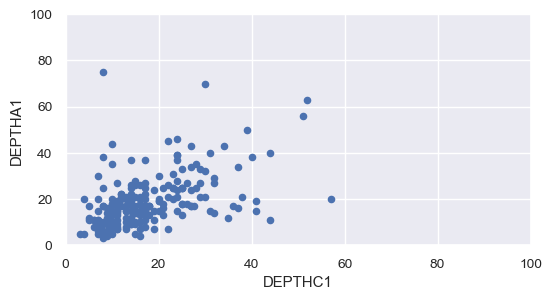

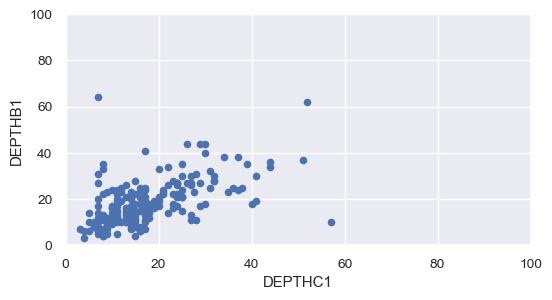


Comparing Depth 2




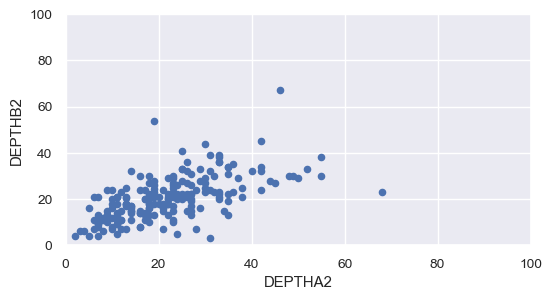

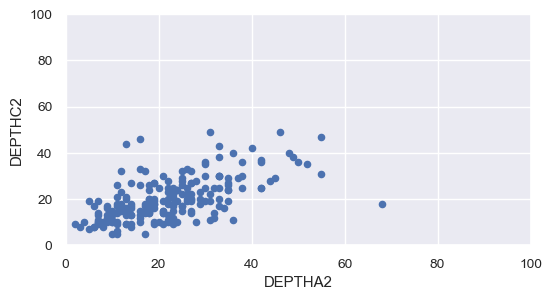

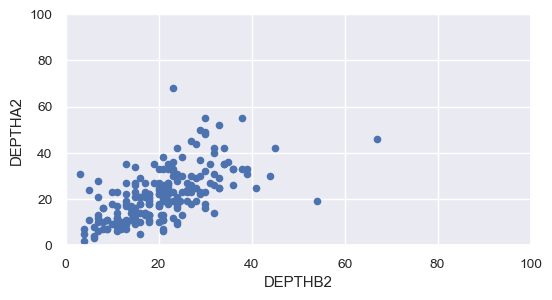

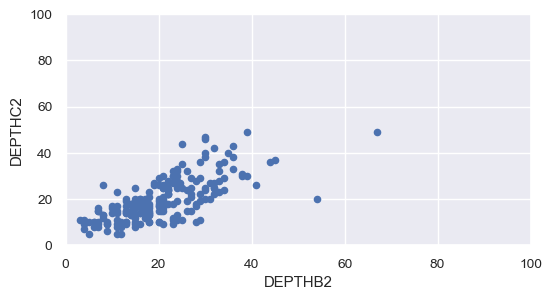

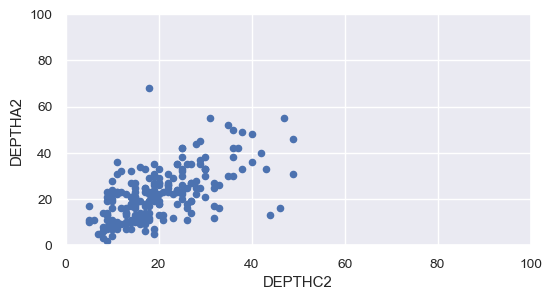

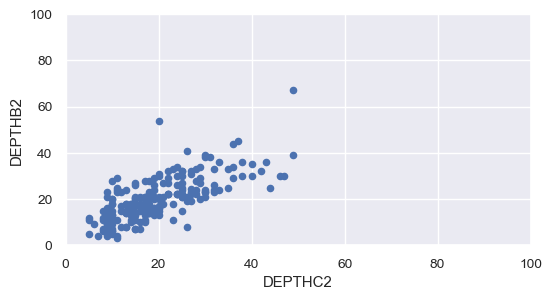


Comparing Depth 3




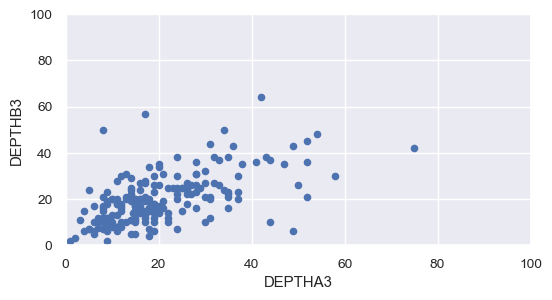

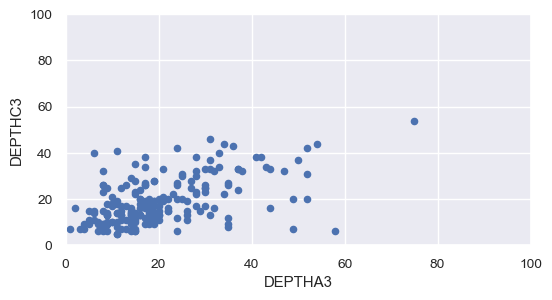

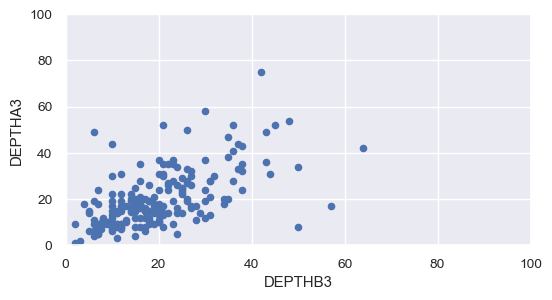

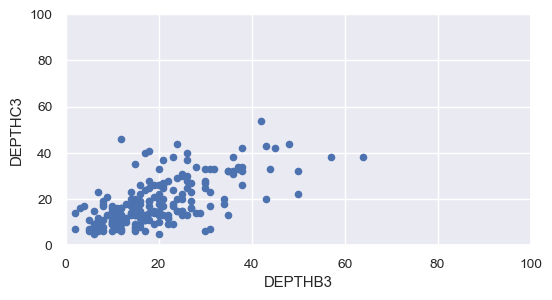

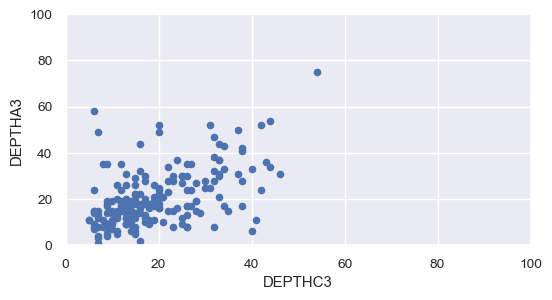

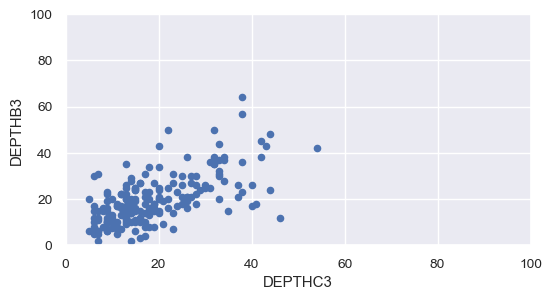

In [39]:
# depth n comparison
for n in range(1,4):
    print(f'\nComparing Depth {n}\n\n')
    features = [f'DEPTHA{n}', f'DEPTHB{n}', f'DEPTHC{n}']
    for x, y in permutations(features, 2):
        if df_gsite.dropna(subset=[x, y]).shape[0]:
            df_gsite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()

### LENGTH_RIGHT_BANK vs LENGTH_LEFT_BANK

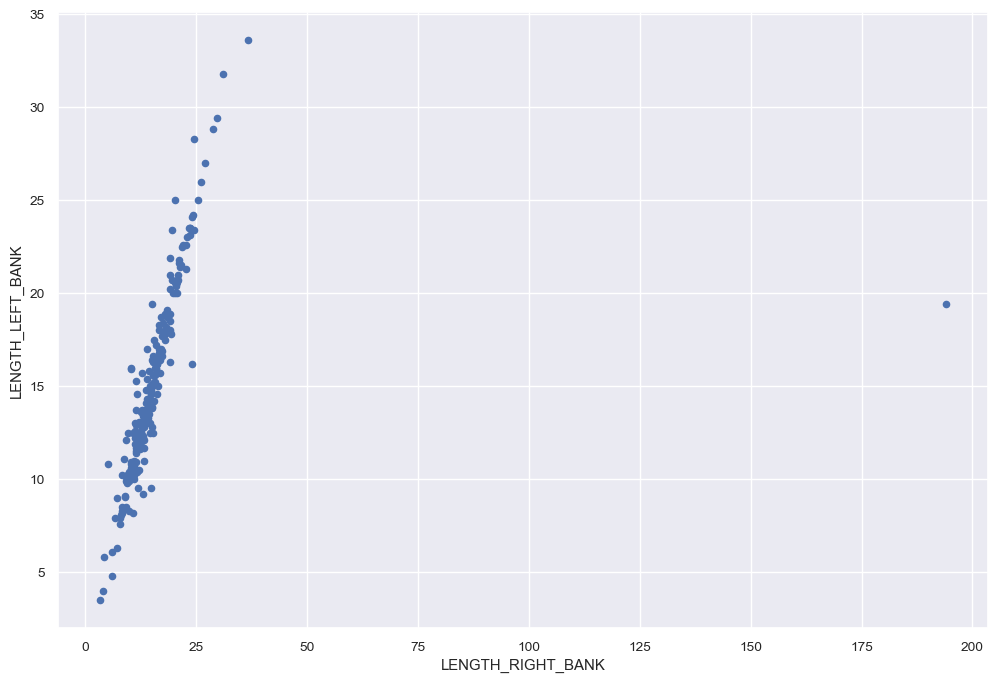

In [40]:
df_gsite.plot(kind='scatter', x='LENGTH_RIGHT_BANK', y='LENGTH_LEFT_BANK', figsize=(12, 8));

In [41]:
# this outlier looks like an error - off by exactly 10x
df_gsite[df_gsite.LENGTH_RIGHT_BANK>50][['LENGTH_RIGHT_BANK', 'LENGTH_LEFT_BANK']]

,LENGTH_RIGHT_BANK,LENGTH_LEFT_BANK
79,194.00,19.40


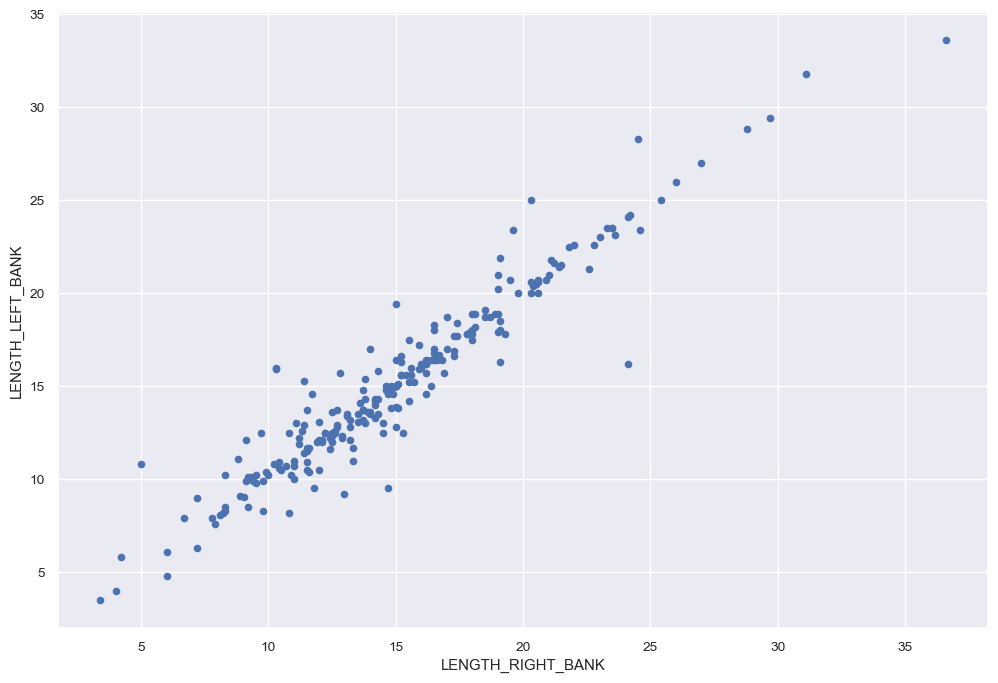

In [42]:
df_gsite[df_gsite.LENGTH_RIGHT_BANK<50].plot(kind='scatter', x='LENGTH_RIGHT_BANK', y='LENGTH_LEFT_BANK', figsize=(12, 8));

### WIDTH_LOWER, WIDTH_MIDDLE, WIDTH_UPPER, FULL_WETTED_WIDTH

In [43]:
# why is full wetted width 10x the other widths?
width_features = ['WIDTH_LOWER', 'WIDTH_MIDDLE', 'WIDTH_UPPER', 'FULL_WETTED_WIDTH']
df_gsite[width_features].describe(percentiles=[.01, .1, .9, .99]).T

,count,mean,std,min,1%,10%,50%,90%,99%,max
WIDTH_LOWER,237.00,7.00,3.27,2.00,2.37,3.56,6.00,11.40,17.12,22.00
WIDTH_MIDDLE,202.00,6.87,3.18,2.20,2.70,3.70,6.00,10.80,17.29,20.50
WIDTH_UPPER,238.00,7.30,3.28,2.10,2.40,4.00,6.35,11.23,17.68,20.50
FULL_WETTED_WIDTH,93.00,89.58,30.63,33.07,38.37,56.84,87.11,132.11,154.24,202.99


it is an area:
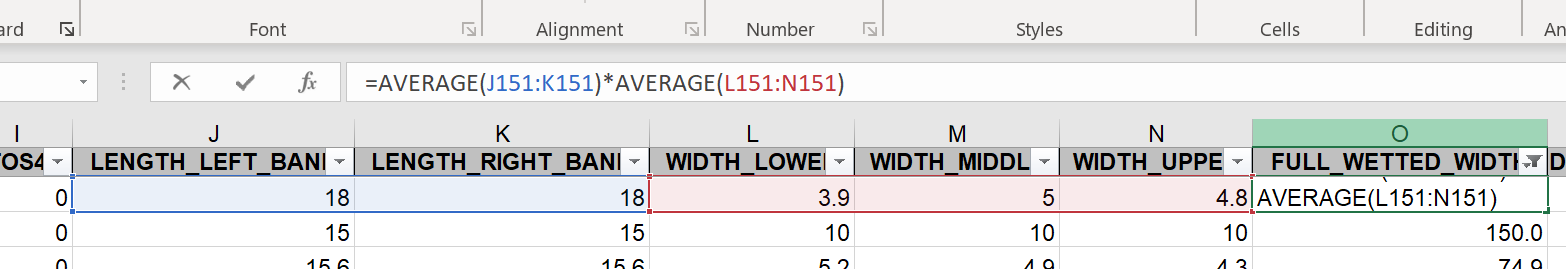

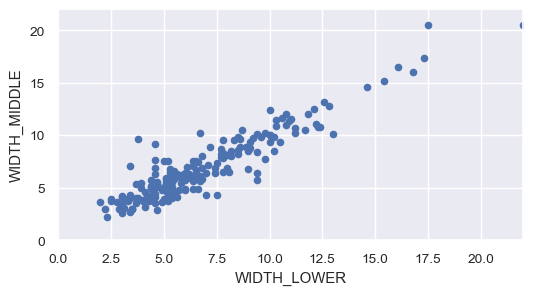

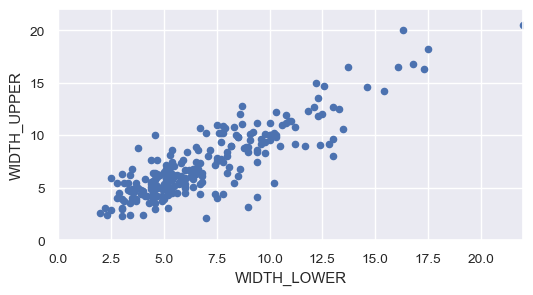

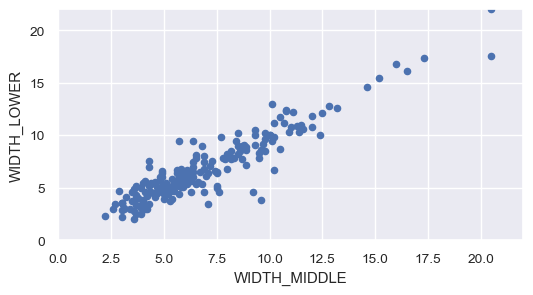

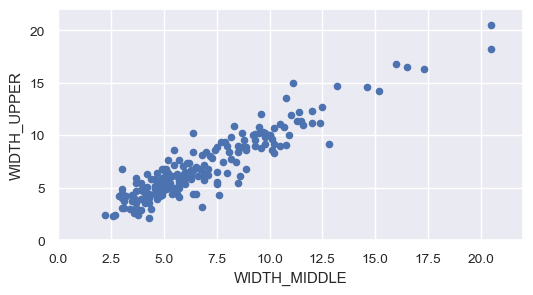

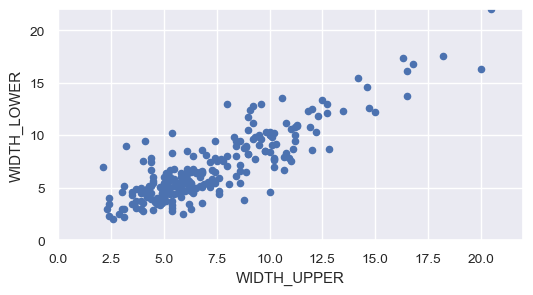

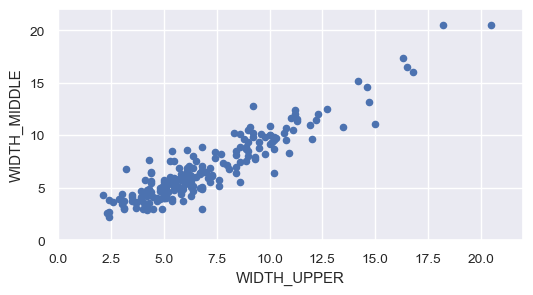

In [44]:
features = ['WIDTH_LOWER', 'WIDTH_MIDDLE', 'WIDTH_UPPER']
limits = (0, df_gsite[features].max().max())
for x, y in permutations(features, 2):
    if df_gsite.dropna(subset=[x, y]).shape[0]:
        df_gsite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
        plt.show()

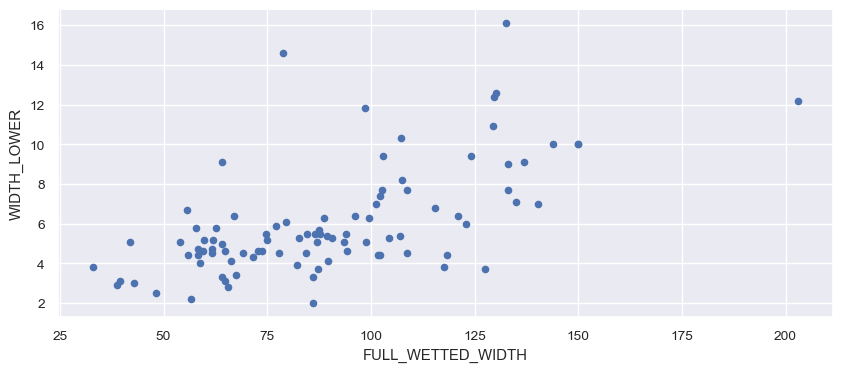

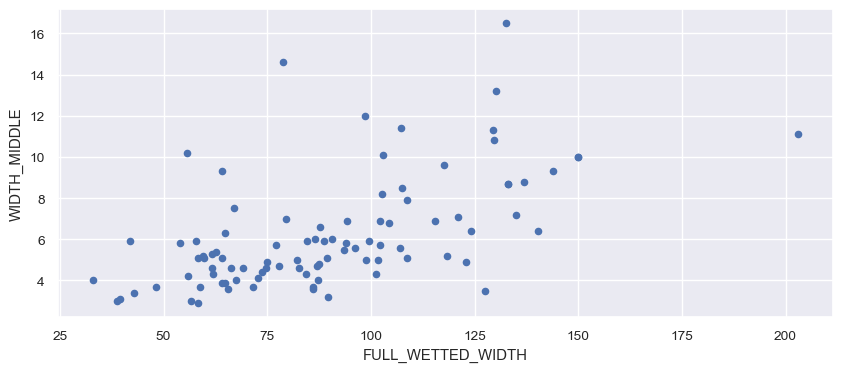

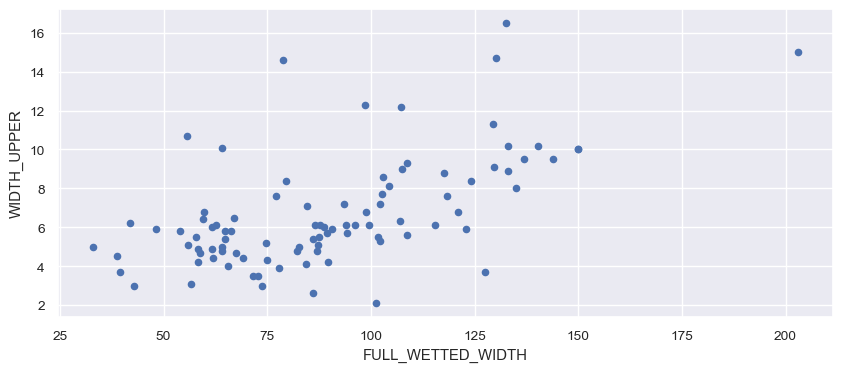

In [45]:
features = ['WIDTH_LOWER', 'WIDTH_MIDDLE', 'WIDTH_UPPER']
for y in features:
    if df_gsite.dropna(subset=[x, y]).shape[0]:
        df_gsite.plot(kind='scatter', x='FULL_WETTED_WIDTH', y=y, figsize=(10,4))
        plt.show()

In [46]:
df_gsite[df_gsite.FULL_WETTED_WIDTH>200].iloc[:, 9:15]

,LENGTH_LEFT_BANK,LENGTH_RIGHT_BANK,WIDTH_LOWER,WIDTH_MIDDLE,WIDTH_UPPER,FULL_WETTED_WIDTH
210,15.90,15.90,12.20,11.10,15.00,202.99


In [47]:
# calculated correctly
round(df_gsite[df_gsite.FULL_WETTED_WIDTH>200].iloc[:, 9:11].values.mean() * df_gsite[df_gsite.FULL_WETTED_WIDTH>200].iloc[:, 11:14].values.mean(), 2)

202.99

### do all of the pebble rock sands add to 1?

In [48]:
# none - shoot, these need to be numeric....., back to the old notebook
rock_columns = [x for x in df_gsite.columns if 'SUB_TYPE' in x and 'outlier' not in x and 'FLAG' not in x]
df_gsite[rock_columns].sum(axis=1).describe()

count   244.00
mean     98.22
std      12.80
min       0.00
25%     100.00
50%     100.00
75%     100.00
max     110.00
dtype: float64

In [49]:
df_gsite[rock_columns].dtypes

SUB_TYPE_FINES      float64
SUB_TYPE_SAND       float64
SUB_TYPE_GRAVEL     float64
SUB_TYPE_PEBBLE     float64
SUB_TYPE_COBBLE     float64
SUB_TYPE_ROCKS      float64
SUB_TYPE_BOULDER    float64
SUB_TYPE_BEDROCK    float64
dtype: object

In [50]:
# these rows are incorrect (but all are either relatively close or Null)
pd.concat([
    df_gsite.loc[(df_gsite[rock_columns].sum(axis=1) != 100), rock_columns],
    df_gsite.loc[(df_gsite[rock_columns].sum(axis=1) != 100), rock_columns].sum(axis=1)
], axis=1).rename({0: 'SUM_OF_ALL_SUB_TYPES'}, axis=1)

,SUB_TYPE_FINES,SUB_TYPE_SAND,SUB_TYPE_GRAVEL,SUB_TYPE_PEBBLE,SUB_TYPE_COBBLE,SUB_TYPE_ROCKS,SUB_TYPE_BOULDER,SUB_TYPE_BEDROCK,SUM_OF_ALL_SUB_TYPES
0,0.00,5.00,5.00,20.00,40.00,20.00,15.00,0.00,105.00
14,0.00,5.00,20.00,30.00,30.00,5.00,0.00,0.00,90.00
18,0.00,10.00,50.00,20.00,5.00,20.00,5.00,0.00,110.00
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
138,0.00,0.00,5.00,35.00,20.00,20.00,10.00,0.00,90.00
189,0.00,0.00,5.00,50.00,25.00,10.00,5.00,0.00,95.00
198,0.00,0.00,15.00,35.00,30.00,5.00,5.00,0.00,90.00
211,5.00,5.00,10.00,30.00,35.00,5.00,0.00,0.00,90.00
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [51]:
df_gsite.loc[(df_gsite[rock_columns].sum(axis=1) != 100), rock_columns].sum(axis=1)

0     105.00
14     90.00
18    110.00
39      0.00
55      0.00
138    90.00
189    95.00
198    90.00
211    90.00
216     0.00
224     0.00
240    95.00
dtype: float64

### MAR SITES

In [52]:
df_msite_stats = create_stats(df_msite, ['ID'])
df_msite_stats = df_msite_stats.dropna()
df_msite = flag_outliers(df_msite, df_msite_stats)

In [53]:
print_outlier_info(df_msite)

TOS2                   
              mean   min    max count
outlier_TOS2                         
high         97.95 90.00 100.00    22
normal       15.93  0.00  80.00   162

TOS4                  
              mean   min   max count
outlier_TOS4                        
high         20.00 20.00 20.00     1
normal        0.05  0.00 10.00   183

LENGTH_LEFT_BANK                  
                                     mean   min   max count
outlier_LENGTH_LEFT_BANK                                   
high                                48.61 40.00 63.07    49
low                                  5.53  5.30  5.70     3
normal                              19.24  6.10 39.00   527

LENGTH_RIGHT_BANK                  
                                       mean   min   max count
outlier_LENGTH_RIGHT_BANK                                    
high                                  49.12 39.20 63.20    49
low                                    5.47  5.30  5.60     3
normal                                19.41  6.30 38.71   527

WIDTH_LOWER                  
                           mean   min   max count
outlier_WIDTH_LOWER                              
high                      31.64 19.50 49.60    59
low                        2.73  2.44  3.05     6
normal                     9.02  3.30 19.20   518

WIDTH_MIDDLE                  
                             mean   min   max count
outlier_WIDTH_MIDDLE                               
high                        17.83 15.10 30.50    18
low                          2.75  2.50  3.00     2
normal                       8.17  3.30 15.00   261

WIDTH_UPPER                  
                           mean   min   max count
outlier_WIDTH_UPPER                              
high                      32.61 20.55 51.21    52
low                        2.45  2.00  2.90     2
normal                     9.48  3.35 20.30   521

FULL_WETTED_WIDTH                     
                                       mean    min     max count
outlier_FULL_WETTED_WIDTH                                       
high                                 804.19 593.65 1136.77    46
low                                   52.66  46.11   56.23     3
normal                               210.15  56.28  585.00   466

DEPTHA1                   
                   mean   min    max count
outlier_DEPTHA1                           
high              64.46 48.77 114.30    26
low                1.52  0.00   3.05     2
normal            22.02  5.00  45.72   343

DEPTHA2                  
                   mean   min   max count
outlier_DEPTHA2                          
high              52.34 48.77 62.48    11
low                3.05  0.00  6.10     2
normal            23.95  7.00 44.20   241

DEPTHA3                  
                   mean   min   max count
outlier_DEPTHA3                          
high              50.08 47.24 54.00     3
low                0.23  0.00  0.46     2
normal            14.41  0.61 45.00   248

DEPTHB1                   
                   mean   min    max count
outlier_DEPTHB1                           
high              74.98 49.38 152.40    32
low                2.02  0.00   3.05     3
normal            22.12  5.00  48.30   339

DEPTHB2                  
                   mean   min   max count
outlier_DEPTHB2                          
high              53.59 45.00 78.70    15
low                1.52  0.00  3.05     2
normal            23.33  6.00 42.67   238

DEPTHB3                   
                   mean   min    max count
outlier_DEPTHB3                           
high              58.77 45.72 106.70    10
low                1.50  0.00   3.00     2
normal            20.46  3.05  45.00   243

DEPTHC1                   
                   mean   min    max count
outlier_DEPTHC1                           
high              60.56 48.00 114.30    18
low                1.52  0.00   3.05     2
normal            22.36  4.00  47.24   350

DEPTHC2                  
                   mean   min   max count
outlier_DEPTHC2                          
high              52.11 45.00 64.01    10
low                3.26  0.00  5.00     4
normal            23.95  7.50 43.00   239

DEPTHC3                  
                   mean   min   max count
outlier_DEPTHC3                          
high              45.66 38.00 71.63    18
low                2.29  0.00  3.05     4
normal            19.15  5.00 37.00   231

DEPTH_MAX                  
                       mean   min   max count
outlier_DEPTH_MAX                            
high                  63.40 53.00 70.00     5
low                   16.12 13.00 19.00     6
normal                35.32 19.50 50.00   122

AIR_TEMPERATURE                  
                                   mean   min   max count
outlier_AIR_TEMPERATURE                                  
high                              29.44 28.89 30.00     2
low                               11.10 10.20 12.00     2
normal                            20.40 13.33 27.78    72

WATER_TEMPERATURE_ARRIVAL                  
                                                       mean   min   max count
outlier_WATER_TEMPERATURE_ARRIVAL                                            
high                                                  22.47 21.50 24.20     8
low                                                    8.38  7.20  8.90     5
normal                                                15.04  9.10 21.10   349

WATER_TEMP1                  
                           mean   min   max count
outlier_WATER_TEMP1                              
high                      20.13 19.70 20.90     3
low                       10.00 10.00 10.00     1
normal                    14.06 10.70 18.50    30

WATER_PH                  
                     mean   min   max count
outlier_WATER_PH                           
high                11.90 11.90 11.90     1
normal               7.35  6.20  8.60    44

WATER_CONDUCTIVITY                    
                                         mean    min    max count
outlier_WATER_CONDUCTIVITY                                       
high                                   306.84 219.00 760.00    49
low                                     20.00  15.00  25.00     2
normal                                  90.18  40.00 212.60   298

WATER_CONDUCTIVITY_RESOLUTION        \
                                                               mean   min   
outlier_WATER_CONDUCTIVITY_RESOLUTION                                       
high                                                          61.00 61.00   
low                                                           50.00 50.00   
normal                                                        53.75 51.00   

                                                   
                                        max count  
outlier_WATER_CONDUCTIVITY_RESOLUTION              
high                                  61.00     1  
low                                   50.00     1  
normal                                57.00     4

SUB_TYPE_FINES                  
                                 mean   min   max count
outlier_SUB_TYPE_FINES                                 
high                            10.00 10.00 10.00     1
normal                           0.13  0.00  5.00   257

SUB_TYPE_SAND                  
                               mean   min   max count
outlier_SUB_TYPE_SAND                                
high                          14.71 10.00 30.00    17
normal                         1.12  0.00  5.00   241

SUB_TYPE_GRAVEL                  
                                   mean   min   max count
outlier_SUB_TYPE_GRAVEL                                  
high                              23.40 17.00 50.00    30
low                                0.04  0.00  1.00    23
normal                             8.07  2.00 15.00   205

SUB_TYPE_PEBBLE                  
                                   mean   min   max count
outlier_SUB_TYPE_PEBBLE                                  
high                              54.55 50.00 65.00    22
low                                1.50  0.00  3.00     2
normal                            21.09  5.00 43.00   233

SUB_TYPE_COBBLE                  
                                   mean   min   max count
outlier_SUB_TYPE_COBBLE                                  
high                              79.30 75.00 90.00    10
low                                7.14  0.00 10.00     7
normal                            41.67 15.00 70.00   241

SUB_TYPE_ROCKS                  
                                 mean   min   max count
outlier_SUB_TYPE_ROCKS                                 
high                            53.12 50.00 70.00     8
normal                          16.82  0.00 45.00   249

SUB_TYPE_BOULDER                  
                                     mean   min   max count
outlier_SUB_TYPE_BOULDER                                   
high                                17.60 15.00 30.00    25
normal                               2.72  0.00 10.00   232

SUB_TYPE_BEDROCK                  
                                     mean   min   max count
outlier_SUB_TYPE_BEDROCK                                   
high                                37.50 25.00 50.00     2
normal                               0.35  0.00 10.00   256

MAX_OVERHANG_L_BK                 
                                       mean  min   max count
outlier_MAX_OVERHANG_L_BK                                   
high                                   9.70 7.00 14.00     5
normal                                 1.47 0.00  6.00   124

MAX_OVERHANG_R_BK                 
                                       mean  min   max count
outlier_MAX_OVERHANG_R_BK                                   
high                                   4.58 3.00 10.00    19
normal                                 0.44 0.00  2.50   112

SWEEP0_5_TIME                     
                               mean    min     max count
outlier_SWEEP0_5_TIME                                   
high                        1198.69 954.00 1805.00    13
low                          255.50 255.00  256.00     2
normal                       538.25 279.00  929.00   256

SWEEP0_5_TEMP                  
                               mean   min   max count
outlier_SWEEP0_5_TEMP                                
high                          18.20 18.20 18.20     1
low                            6.10  6.10  6.10     1
normal                        13.21  8.70 17.30    38

SWEEP1_TIME                      
                           mean     min     max count
outlier_SWEEP1_TIME                                  
high                    3582.88 2580.00 7200.00    34
low                      297.50  283.00  312.00     2
normal                  1172.44  315.00 2400.00   340

SWEEP1_TEMP                  
                           mean   min   max count
outlier_SWEEP1_TEMP                              
high                      21.95 21.11 22.78     4
low                        6.92  6.50  7.10     8
normal                    14.30  7.30 21.10   150

SWEEP2_TIME                      
                           mean     min     max count
outlier_SWEEP2_TIME                                  
high                    3025.24 2160.00 6180.00    29
low                      309.67  258.00  350.00     6
normal                  1116.24  388.00 2130.00   339

SWEEP2_TEMP                  
                           mean   min   max count
outlier_SWEEP2_TEMP                              
high                      22.78 22.78 22.78     2
low                        6.88  6.50  7.00     5
normal                    14.77  7.20 22.00   155

SWEEP3_TIME                      
                           mean     min     max count
outlier_SWEEP3_TIME                                  
high                    2828.28 2100.00 4800.00    29
low                       84.00    0.00  252.00     3
normal                  1042.60  283.00 2070.00   333

SWEEP3_TEMP                 
                           mean  min   max count
outlier_SWEEP3_TEMP                             
low                        6.90 6.90  6.90     1
normal                    15.33 7.00 22.78   159

SWEEP4_TIME                      
                           mean     min     max count
outlier_SWEEP4_TIME                                  
high                    2192.73 1740.00 4200.00    44
low                       51.49    0.00  365.00    37
normal                  1002.30  400.00 1680.00   225

SWEEP4_TEMP                  
                           mean   min   max count
outlier_SWEEP4_TEMP                              
high                      23.00 23.00 23.00     1
low                        7.18  7.00  7.60     5
normal                    15.97  7.90 22.80   150

SWEEP5_TIME                      
                           mean     min     max count
outlier_SWEEP5_TIME                                  
high                    2670.00 1860.00 3600.00     8
low                        0.00    0.00    0.00    52
normal                  1149.64  524.00 1800.00   182

SWEEP5_TEMP                  
                           mean   min   max count
outlier_SWEEP5_TEMP                              
high                      23.33 23.33 23.33     1
low                        7.55  7.30  7.80     2
normal                    16.39  8.00 23.10   143

SWEEP6_TIME                      
                           mean     min     max count
outlier_SWEEP6_TIME                                  
high                    1800.00 1800.00 1800.00    16
normal                   772.45    0.00 1500.00   151

SWEEP6_TEMP                  
                           mean   min   max count
outlier_SWEEP6_TEMP                              
high                      24.00 24.00 24.00     1
low                        8.00  8.00  8.00     1
normal                    16.61  8.30 23.33   116

ELECTROFISHER_CURRENT                   
                                               mean   min    max count
outlier_ELECTROFISHER_CURRENT                                         
high                                         148.11 46.22 250.00     2
low                                            0.81  0.22   2.65    96
normal                                         3.55  3.55   3.55     1

ELECTROFISHER_VOLTAGE                    
                                               mean    min    max count
outlier_ELECTROFISHER_VOLTAGE                                          
high                                         489.50 450.00 600.00    20
low                                          103.44  10.00 140.00    16
normal                                       294.11 150.00 435.00   341

### TOS

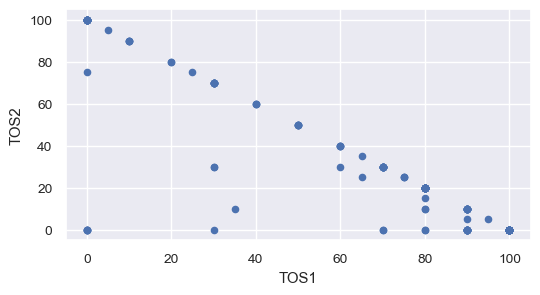

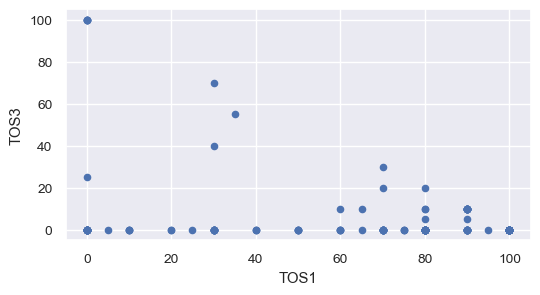

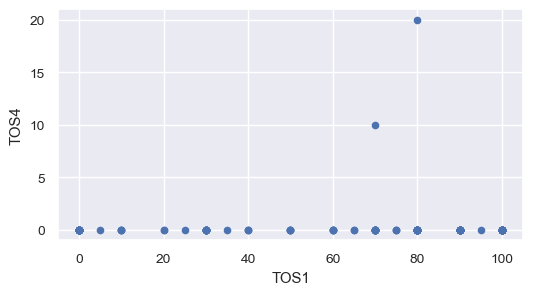

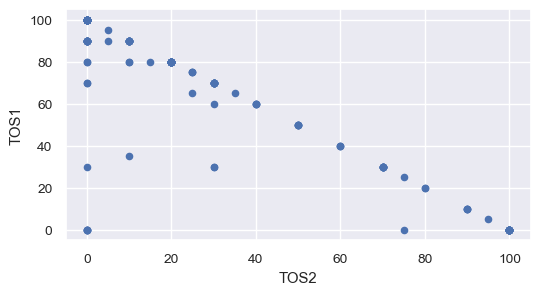

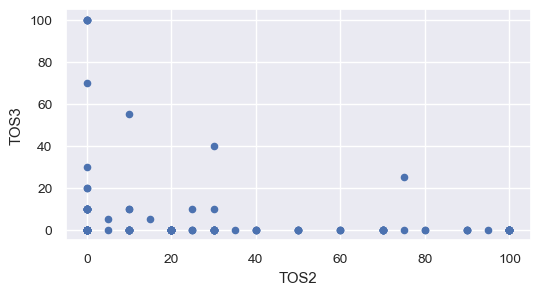

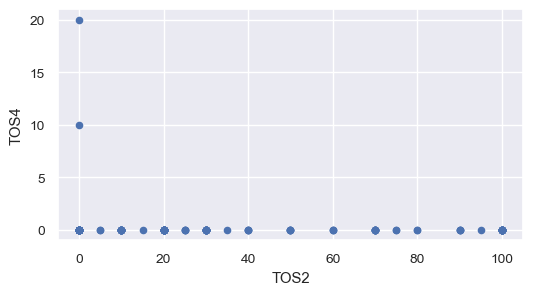

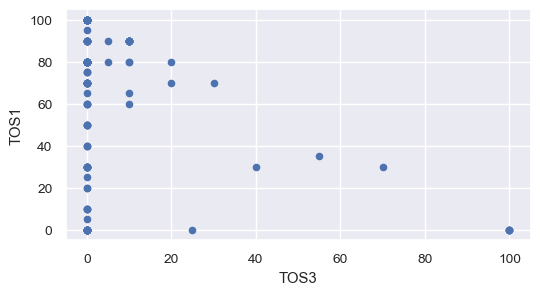

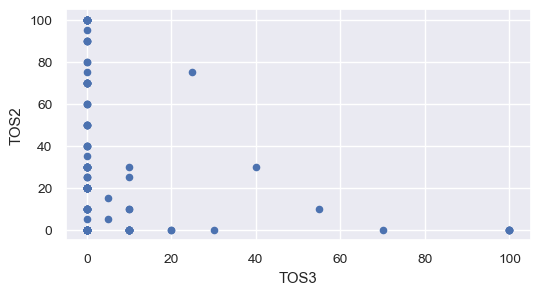

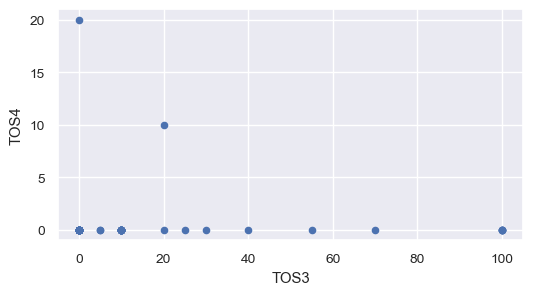

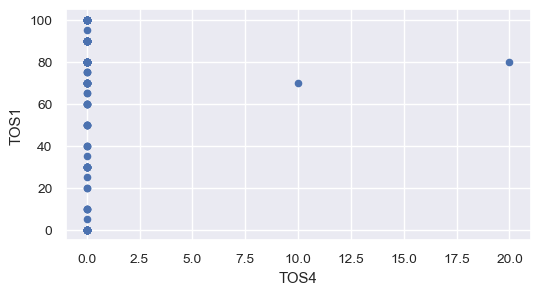

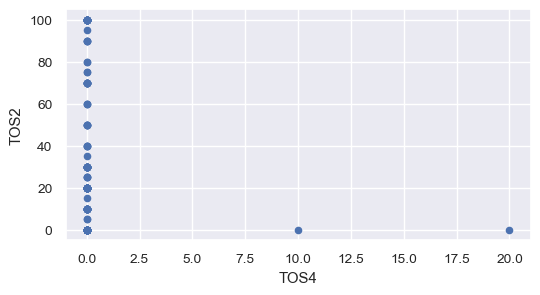

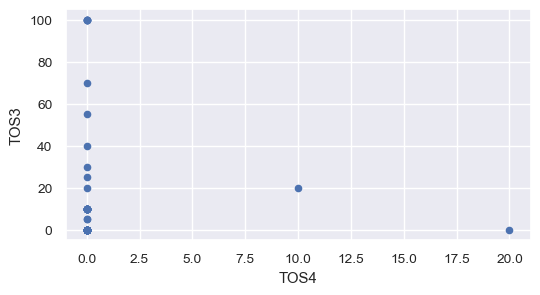

In [54]:
features = ['TOS1', 'TOS2', 'TOS3', 'TOS4']
for x, y in permutations(features, 2):
    df_msite.plot(kind='scatter', x=x, y=y, figsize=(6,3));

### comparing depths
* there are some zeros that may not make sense - we should investigate in detail
* some outliers look sort of odd (beyond 100m depth) - investigate in detail

In [55]:
# A3 looks a bit wonkey
df_msite[[x for x in df_msite.columns if 'DEPTH' in str(x) and len(x)==7]].describe(percentiles=[0.01, 0.05, .1, .25]).dropna(axis=1).T.sort_values('mean')

,count,mean,std,min,1%,5%,10%,25%,50%,max
DEPTHA3,253.00,14.72,12.59,0.00,0.61,0.91,1.22,2.74,12.00,54.00
DEPTHC3,253.00,20.77,10.70,0.00,3.05,6.10,9.14,14.00,19.00,71.63
DEPTHB3,255.00,21.82,12.49,0.00,3.05,6.10,9.00,12.19,21.00,106.70
DEPTHC1,370.00,24.11,13.46,0.00,6.00,8.00,9.14,15.00,22.35,114.30
DEPTHC2,253.00,24.74,10.30,0.00,5.00,9.14,12.04,18.00,24.00,64.01
DEPTHA1,371.00,24.88,15.14,0.00,6.00,8.00,10.00,15.24,22.00,114.30
DEPTHB2,255.00,24.93,11.35,0.00,6.05,9.14,11.00,17.25,24.00,78.70
DEPTHA2,254.00,25.01,10.99,0.00,7.53,9.25,11.00,17.00,24.00,62.48
DEPTHB1,374.00,26.49,19.97,0.00,5.00,6.36,9.14,15.24,22.86,152.40


In [56]:
df_msite[[x for x in df_msite.columns if 'DEPTH' in str(x) and len(x)==7]].max()

DEPTHA1   114.30
DEPTHA2    62.48
DEPTHA3    54.00
DEPTHA4      NaN
DEPTHB1   152.40
DEPTHB2    78.70
DEPTHB3   106.70
DEPTHB4      NaN
DEPTHC1   114.30
DEPTHC2    64.01
DEPTHC3    71.63
DEPTHC4      NaN
dtype: float64

In [57]:
df_msite[df_msite.DEPTHB1>100].dropna(how='all', axis=1).fillna('').T

,9,16,55,65,70,85,121
ID,10,17,56,66,71,86,122
SURVEY,1958,1959,1964,1964,1964,1966,1967
SITE,40,40,14,40,97,40,40
SITE_EVENT_DATE,1958-07-25 00:00:00,1959-07-28 00:00:00,1964-08-21 00:00:00,1964-07-24 00:00:00,1964-08-06 00:00:00,1966-07-25 00:00:00,1967-07-27 00:00:00
LENGTH_LEFT_BANK,46.00,46.00,27.43,46.33,57.91,45.11,45.11
LENGTH_RIGHT_BANK,44.16,44.16,27.43,44.50,57.91,44.20,44.20
WIDTH_LOWER,4.60,4.60,5.49,6.71,18.29,6.10,5.49
WIDTH_UPPER,14.41,14.41,4.57,13.41,16.76,12.19,10.97
FULL_WETTED_WIDTH,428.56,428.56,137.96,456.81,1014.97,408.31,367.48
DEPTHA1,30.48,25.40,17.78,22.86,114.30,22.86,20.32



Comparing Depth A




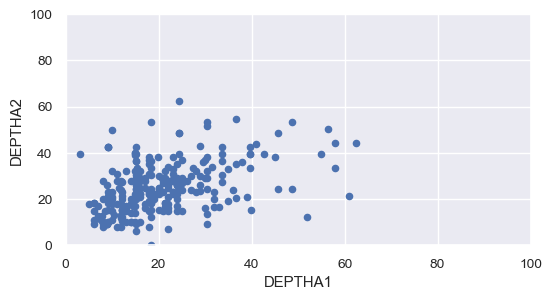

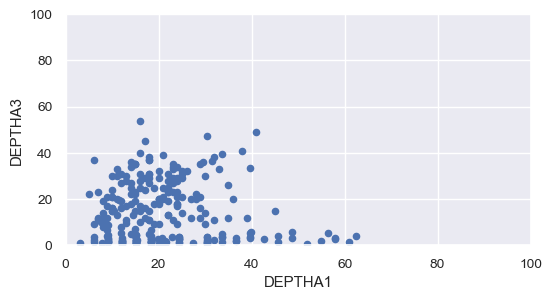

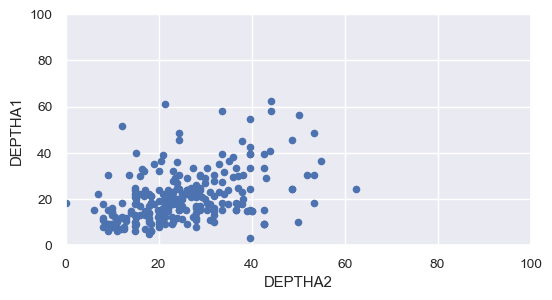

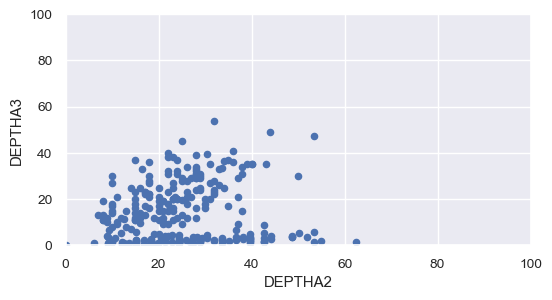

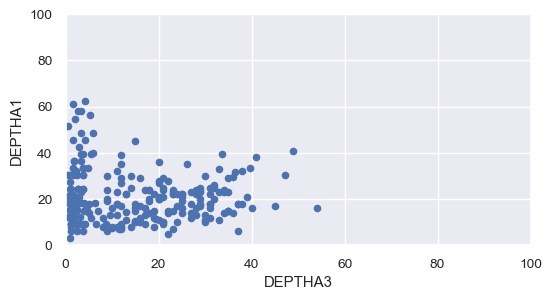

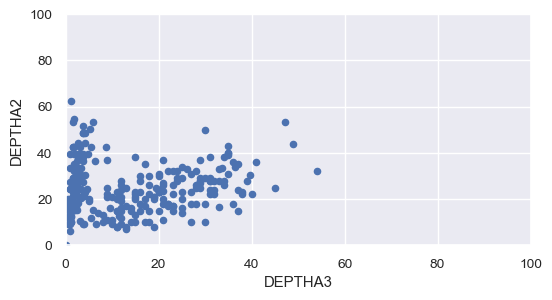


Comparing Depth B




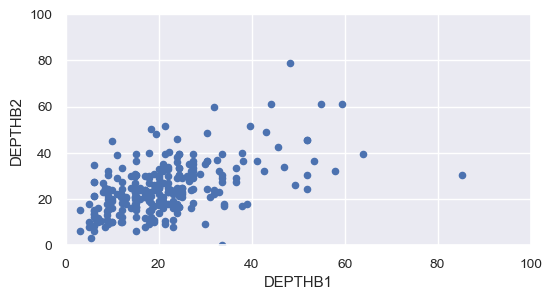

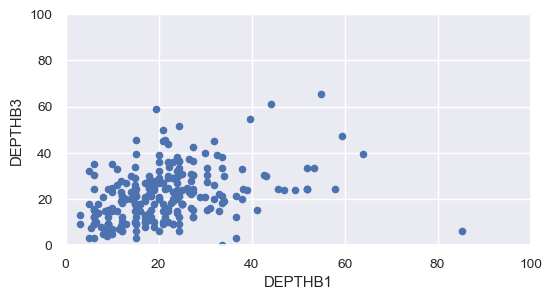

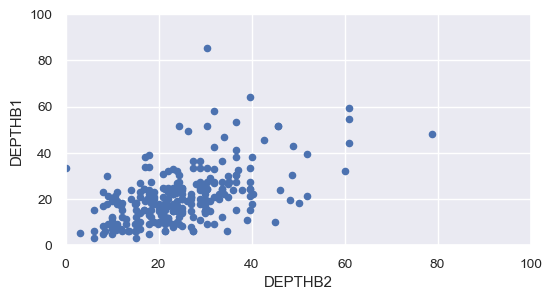

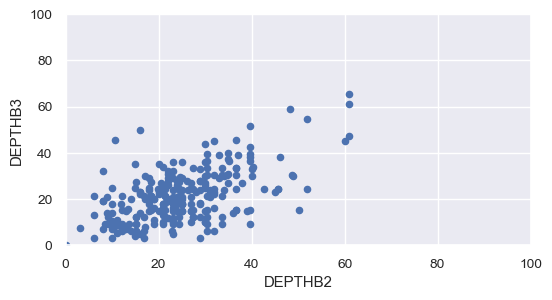

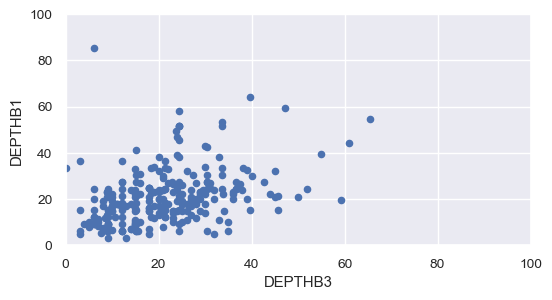

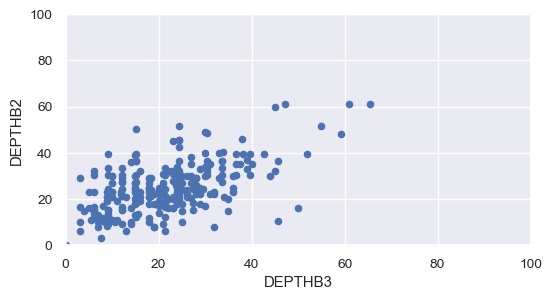


Comparing Depth C




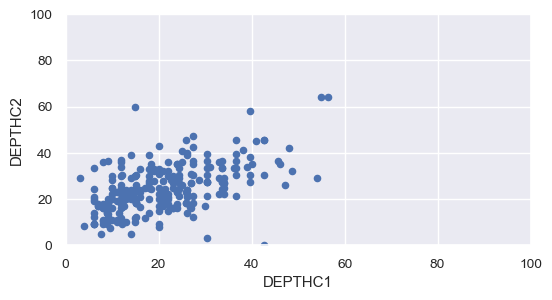

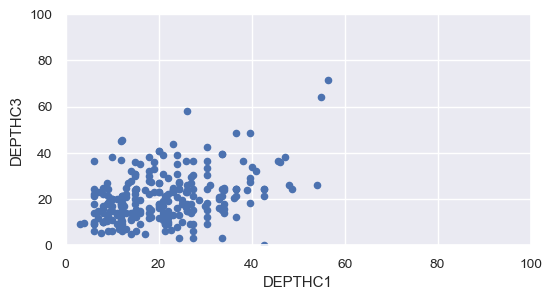

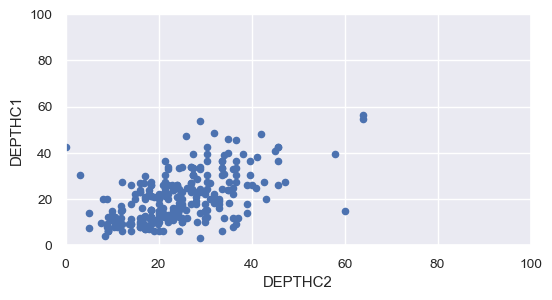

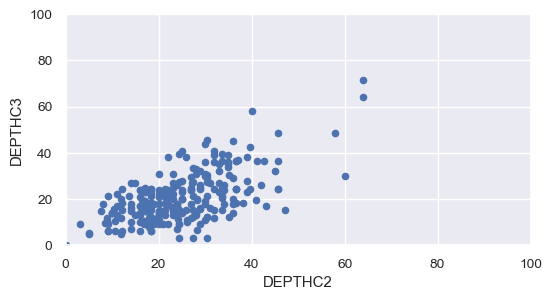

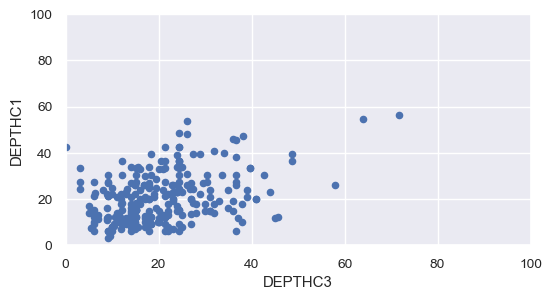

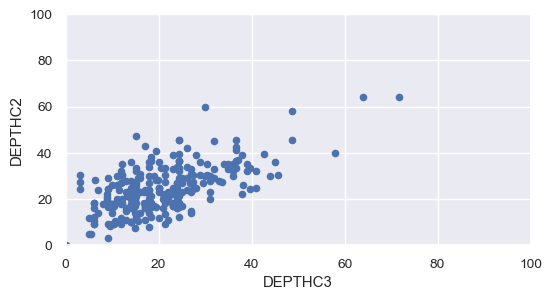

In [58]:
# depth comparison
limits=(0,100)
for L in ['A', 'B', 'C']:
    print(f'\nComparing Depth {L}\n\n')
    features = [f'DEPTH{L}1', f'DEPTH{L}2', f'DEPTH{L}3', f'DEPTH{L}4']
    for x, y in permutations(features, 2):
        if df_msite.dropna(subset=[x, y]).shape[0]:
            df_msite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()


Comparing Depth 1




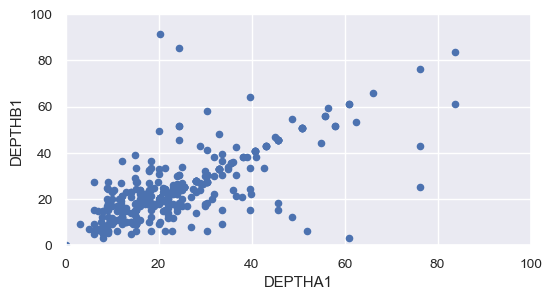

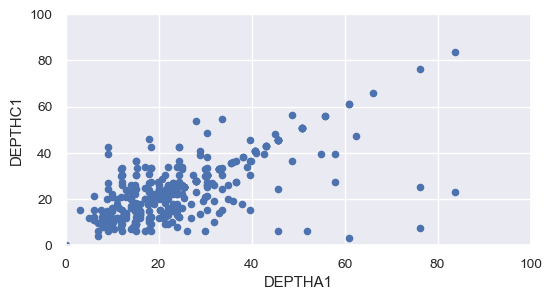

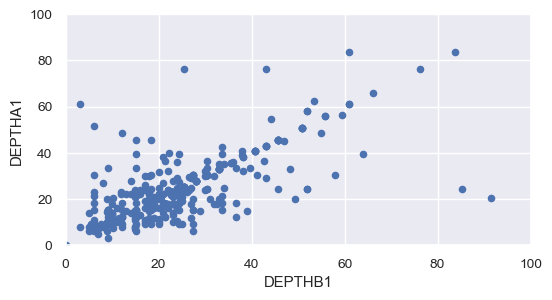

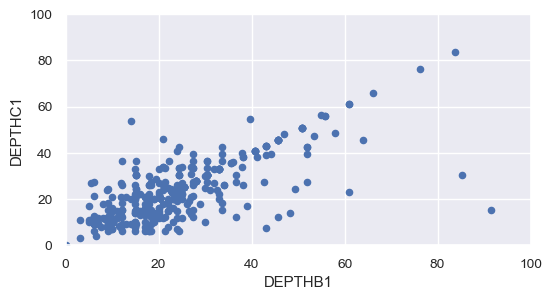

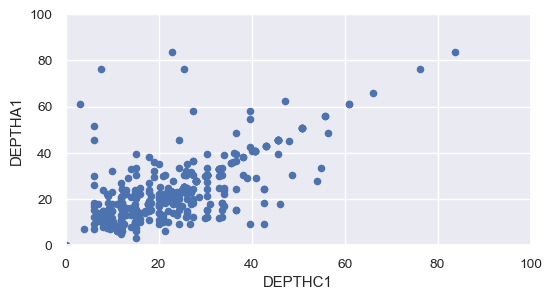

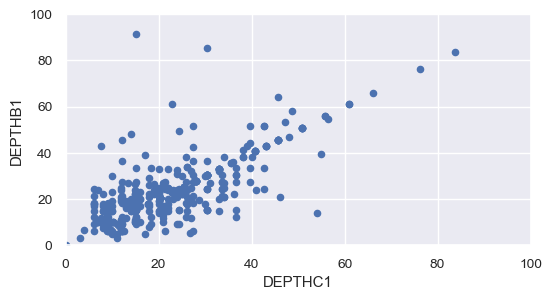


Comparing Depth 2




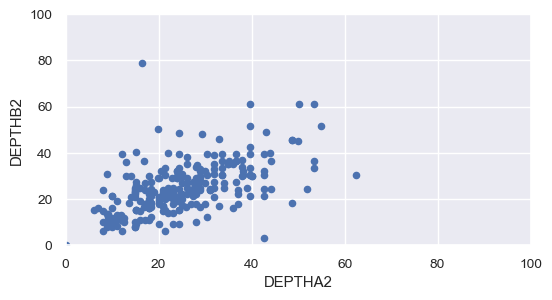

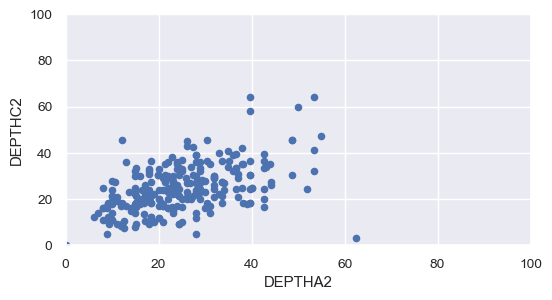

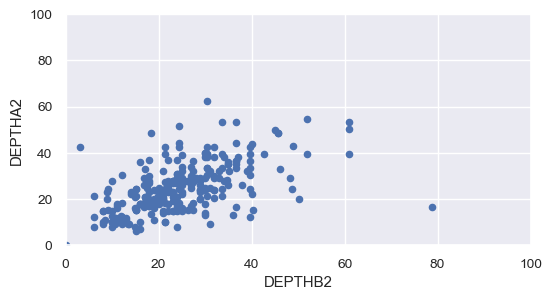

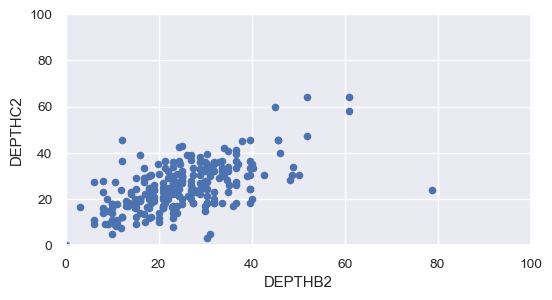

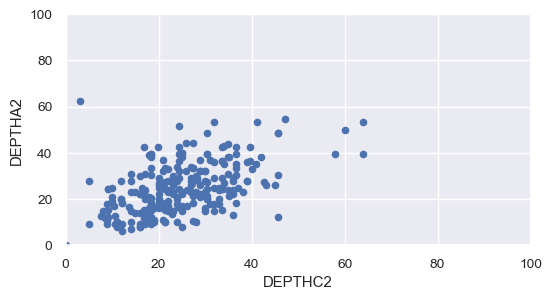

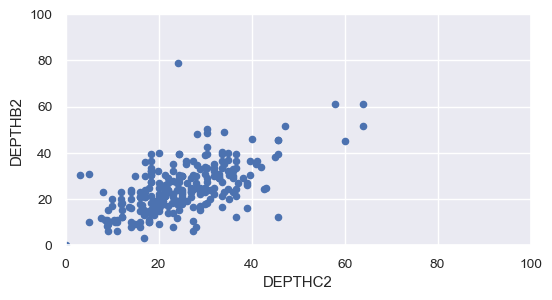


Comparing Depth 3




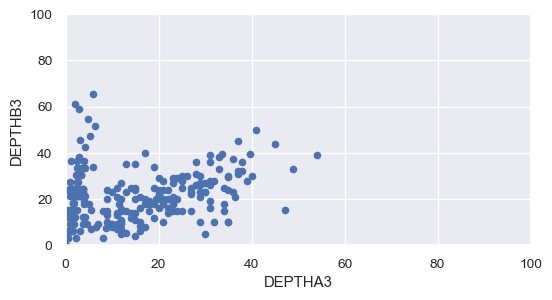

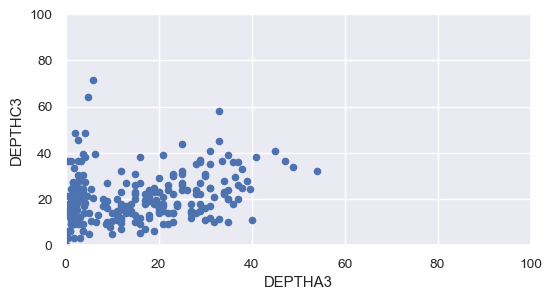

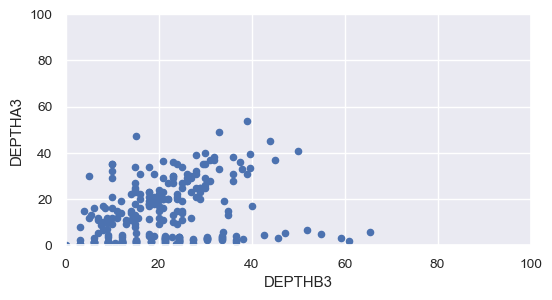

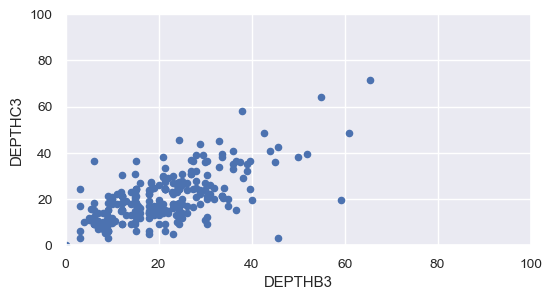

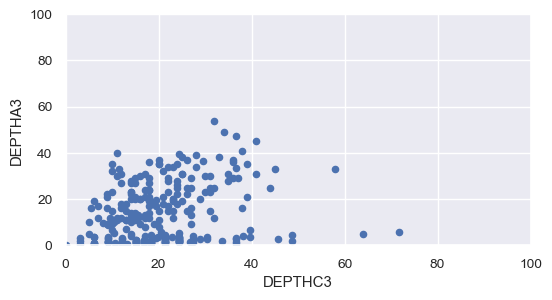

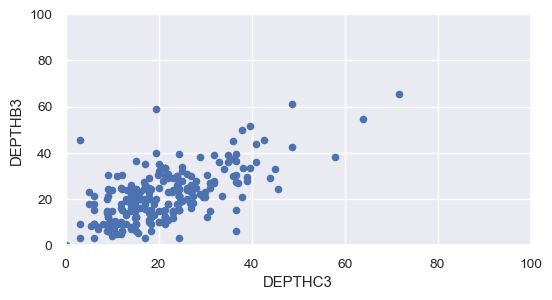

In [59]:
# depth n comparison
for n in range(1,4):
    print(f'\nComparing Depth {n}\n\n')
    features = [f'DEPTHA{n}', f'DEPTHB{n}', f'DEPTHC{n}']
    for x, y in permutations(features, 2):
        if df_msite.dropna(subset=[x, y]).shape[0]:
            df_msite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()

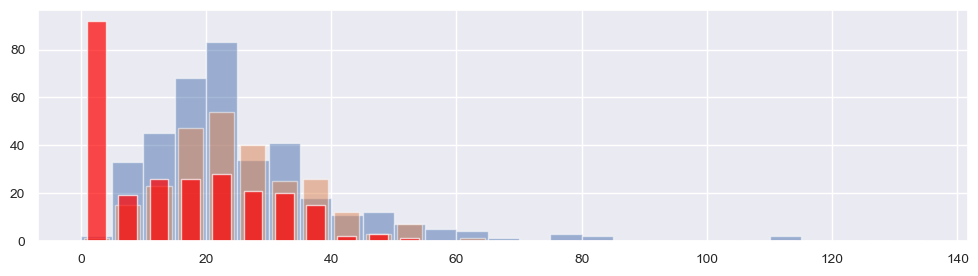

In [60]:
# let's see what's going on with all of the 0s in A3
figsize=(12,3)
plt.figure(figsize=figsize)
binwidth = 5
bins=[x for x in range(0, 140, binwidth)]
df_msite.DEPTHA1.hist(bins=bins, alpha=0.5)
df_msite.DEPTHA2.hist(bins=bins, alpha=0.5, rwidth=0.8)
df_msite.DEPTHA3.hist(bins=bins, alpha=0.7, rwidth=0.6, color='red')
plt.show()   

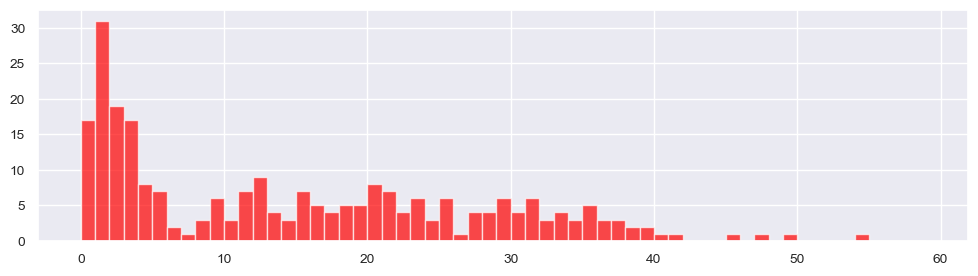

In [61]:
# A3 is definitely acting interestingly
# it's not all zeros, there are a lot of depths less than 5

bins=[x for x in range(0, 60, 1)]
df_msite.DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
plt.show()

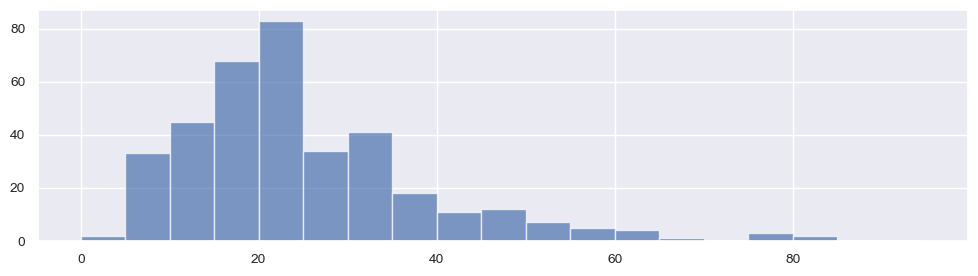

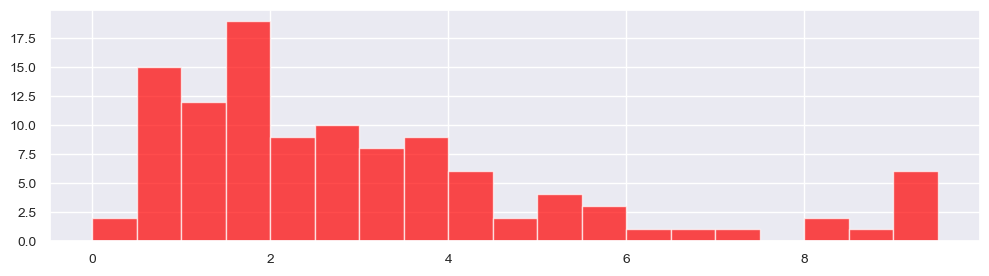

In [62]:
# try comparing to an off by 10x error
# it could be, 
binwidth=5
bins=[x for x in range(0, 100, binwidth)]
df_msite.DEPTHA1.hist(figsize=figsize, bins=bins, alpha=0.7)
plt.show()
bins=[x/10 for x in range(0, 100, binwidth)]
df_msite.DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
plt.show()

In [63]:
# filter by off by 10?
df_msite[(df_msite.DEPTHA3<df_msite.DEPTHA1/10)|(df_msite.DEPTHA3<df_msite.DEPTHA2/10)].DEPTHA3.describe()

count   68.00
mean     1.89
std      1.10
min      0.00
25%      1.10
50%      1.52
75%      2.63
max      5.18
Name: DEPTHA3, dtype: float64

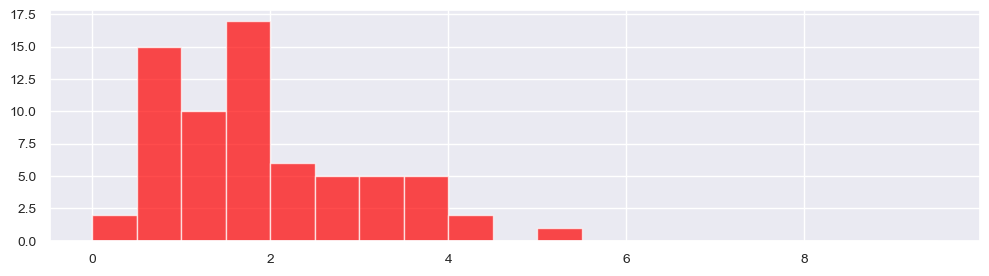

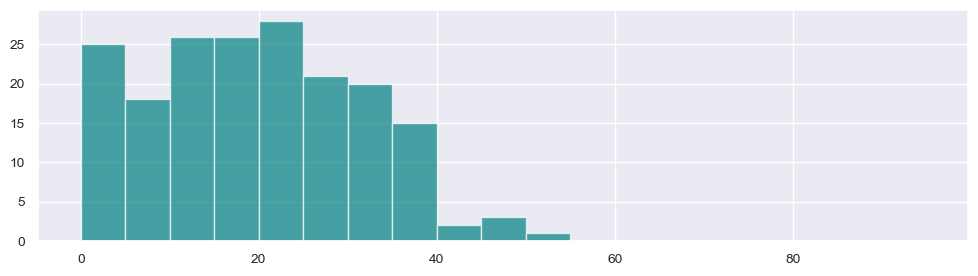

In [64]:
# that didn't work perfectly
filter_10x = (df_msite.DEPTHA3<df_msite.DEPTHA1/10) | (df_msite.DEPTHA3<df_msite.DEPTHA2/10)
bins=[x/10 for x in range(0, 100, binwidth)]
df_msite[filter_10x].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
plt.show()
bins=[x for x in range(0, 100, binwidth)]
df_msite[~filter_10x].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='teal')
plt.show()

In [65]:
# can't use 95%, or we'll miss most of these
df_msite[df_msite.DEPTHA3<5].shape[0], df_msite[df_msite.DEPTHA3>=5].shape[0]

(92, 161)

In [66]:
# about 15% are below 5
df_msite[df_msite.DEPTHA3<5].shape[0] / df_msite.shape[0]

0.14910858995137763

In [67]:
(df_msite[df_msite.DEPTHA3<5].DEPTHA3 / df_msite[df_msite.DEPTHA3<5].DEPTHA1).describe(percentiles=[.025, .975])

count   92.00
mean     0.13
std      0.11
min      0.00
2.5%     0.02
50%      0.10
97.5%    0.43
max      0.60
dtype: float64



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 2


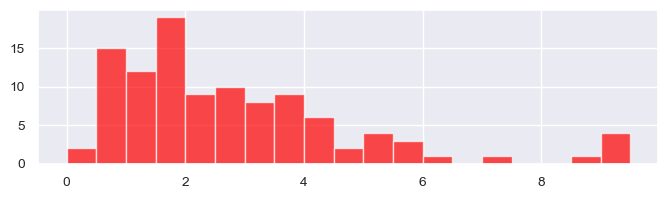

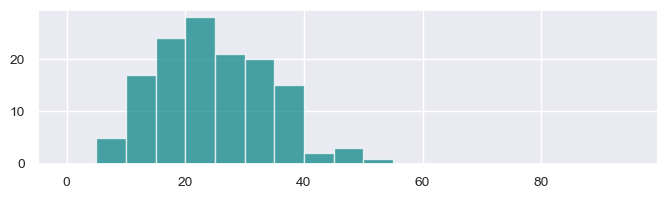



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 3


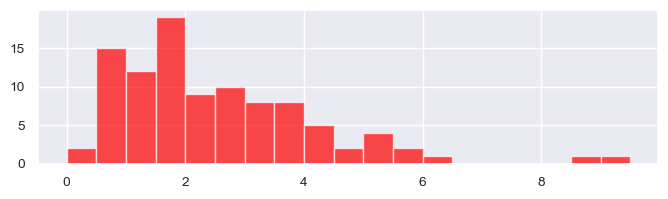

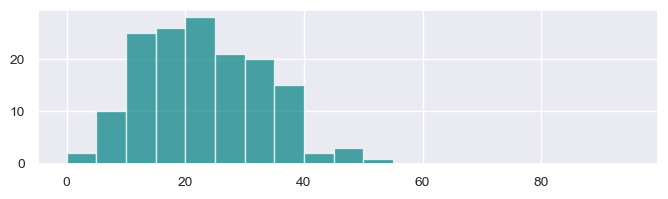



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 5


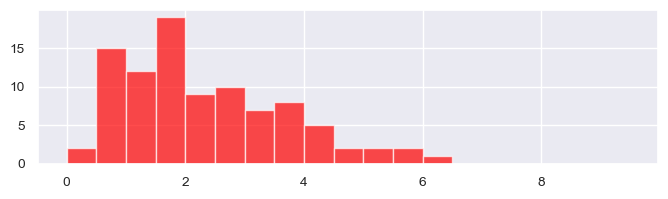

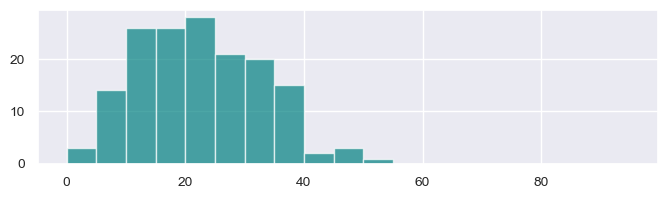



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 7


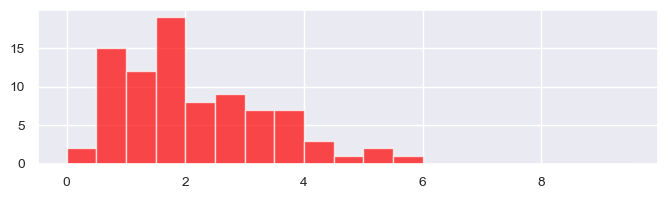

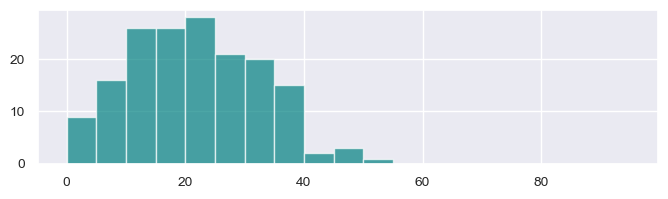



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 10


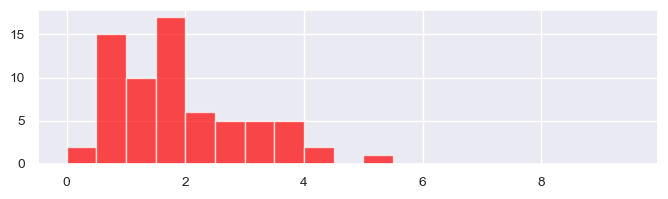

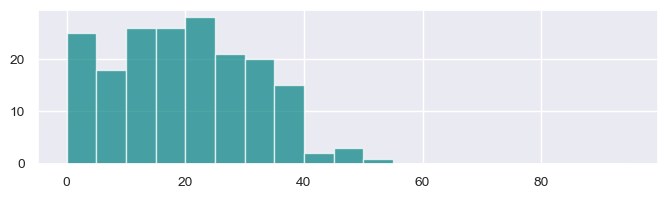



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 20


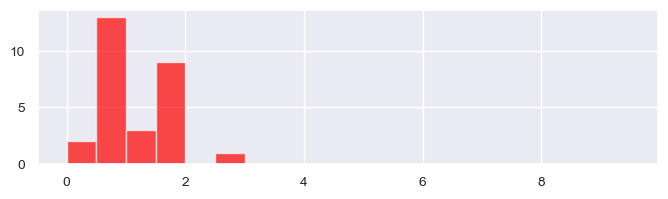

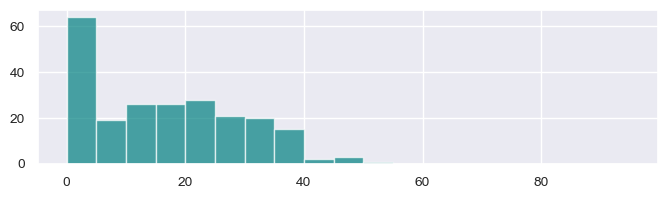

In [68]:
# loop through filter ratios until they are the same distribution
# looks like 3 or 5 maybe... not sure how to verify this. 5 has less over 8, probably better.
figsize=(8, 2)
for ratio in [2, 3, 5, 7, 10, 20]:
    print(f'\n\nRATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: {ratio}')
    filter = (df_msite.DEPTHA3<df_msite.DEPTHA1/ratio) | (df_msite.DEPTHA3<df_msite.DEPTHA2/ratio)
    bins=[x/10 for x in range(0, 100, binwidth)]
    df_msite[filter].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
    plt.show()
    bins=[x for x in range(0, 100, binwidth)]
    df_msite[~filter].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='teal')
    plt.show()

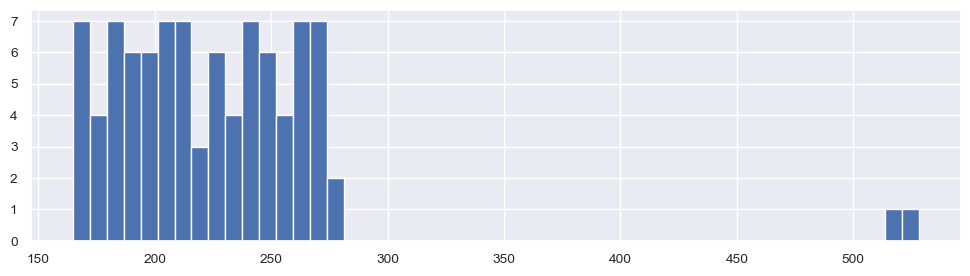

In [69]:
# were all of the wonkey measurements taken/inputted together? (yes, mostly)
df_msite[df_msite.DEPTHA3<5].rename_axis('idx').reset_index().idx.hist(figsize=(12,3), bins=50);

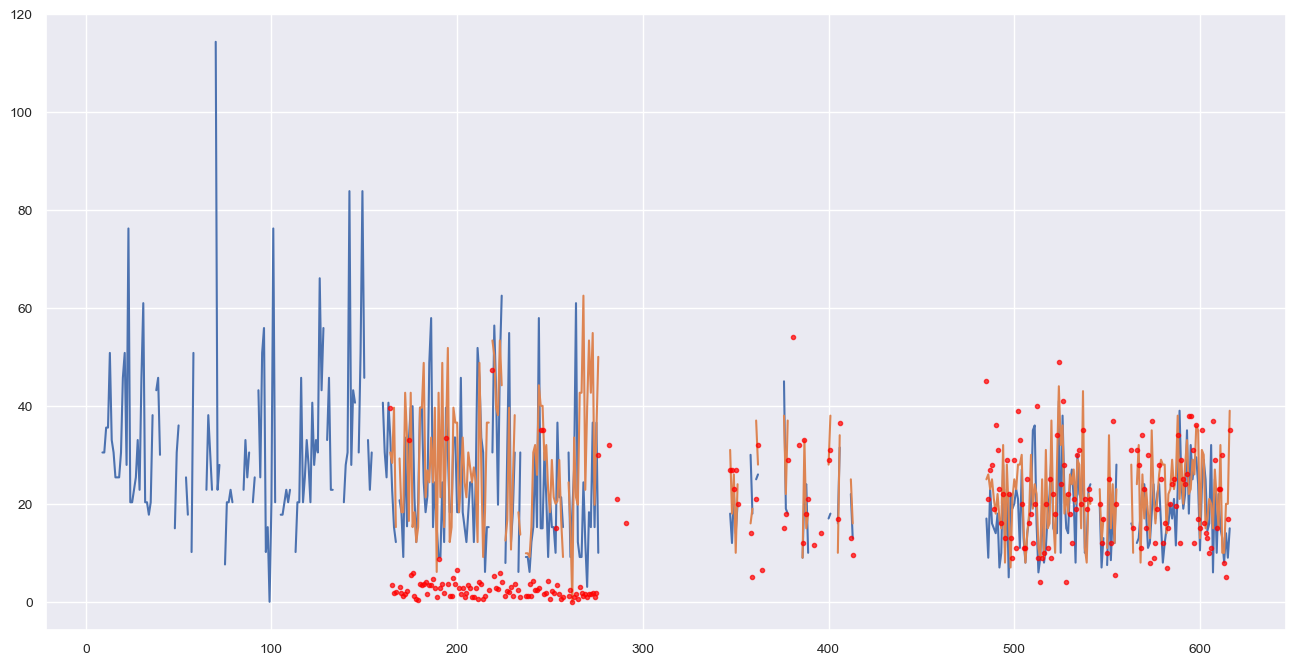

In [70]:
plt.figure(figsize=(16,8))
df_msite.DEPTHA1.plot()
df_msite.DEPTHA2.plot()
df_msite.DEPTHA3.plot(color='red', marker='.', linestyle='', alpha=0.7)
plt.show()

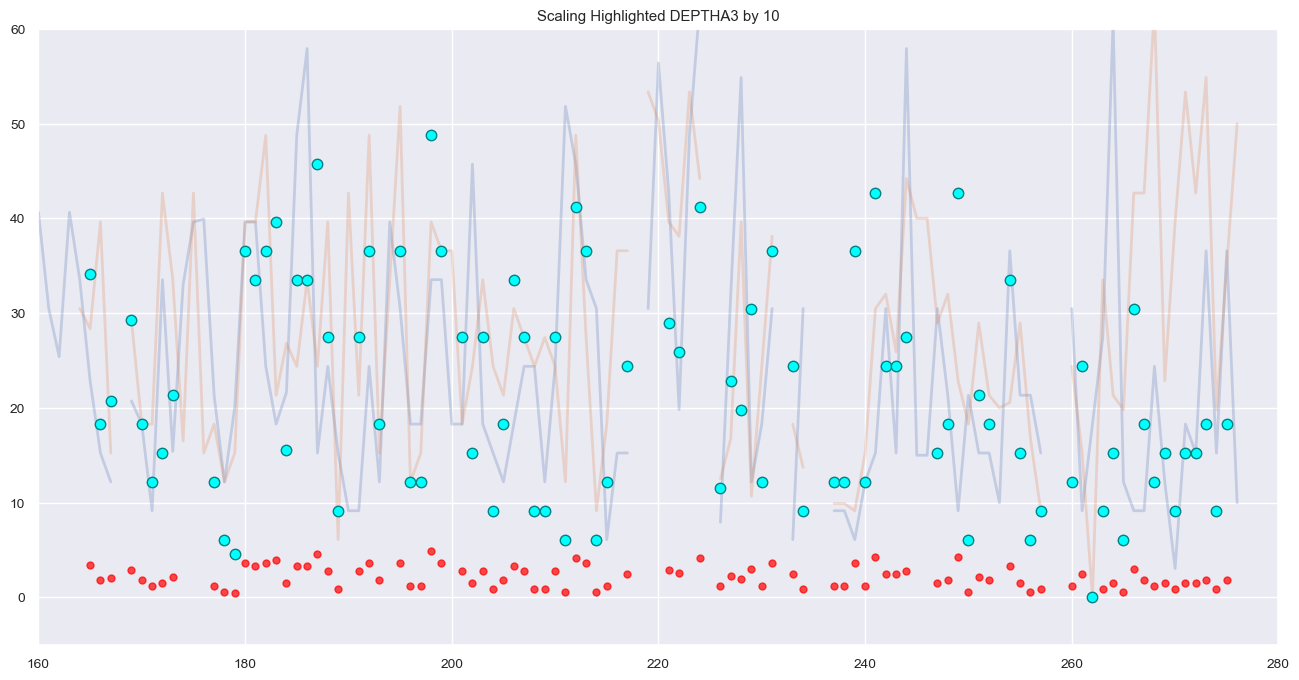

In [71]:
plt.figure(figsize=(16,8))
plt.xlim(160, 280)
plt.ylim(-5, 60)
df_msite.DEPTHA1.plot(alpha=0.25, linewidth=2)
df_msite.DEPTHA2.plot(alpha=0.25, linewidth=2)
df_msite[df_msite.DEPTHA3<5].DEPTHA3.plot(color='red', marker='.', linestyle='', markersize=10, alpha=0.7)
(df_msite[df_msite.DEPTHA3<5].DEPTHA3*10).plot(color='cyan', marker='.', linestyle='', markersize=15, markeredgecolor='teal')
plt.title('Scaling Highlighted DEPTHA3 by 10')
plt.show()

In [72]:
# RECOMMENDATION: scale by 10x
# NOTE: this depth is supposed to be in CM, if a unit that is 10x less than CM it would be 10x longer... decimeteres?
df_msite.loc[(df_msite.DEPTHA3<5) & (df_msite.ID>160) & (df_msite.ID<280), 'DEPTHA3'].describe()

count   90.00
mean     2.15
std      1.14
min      0.00
25%      1.22
50%      1.83
75%      3.02
max      4.88
Name: DEPTHA3, dtype: float64

### LENGTH_RIGHT_BANK vs LENGTH_LEFT_BANK

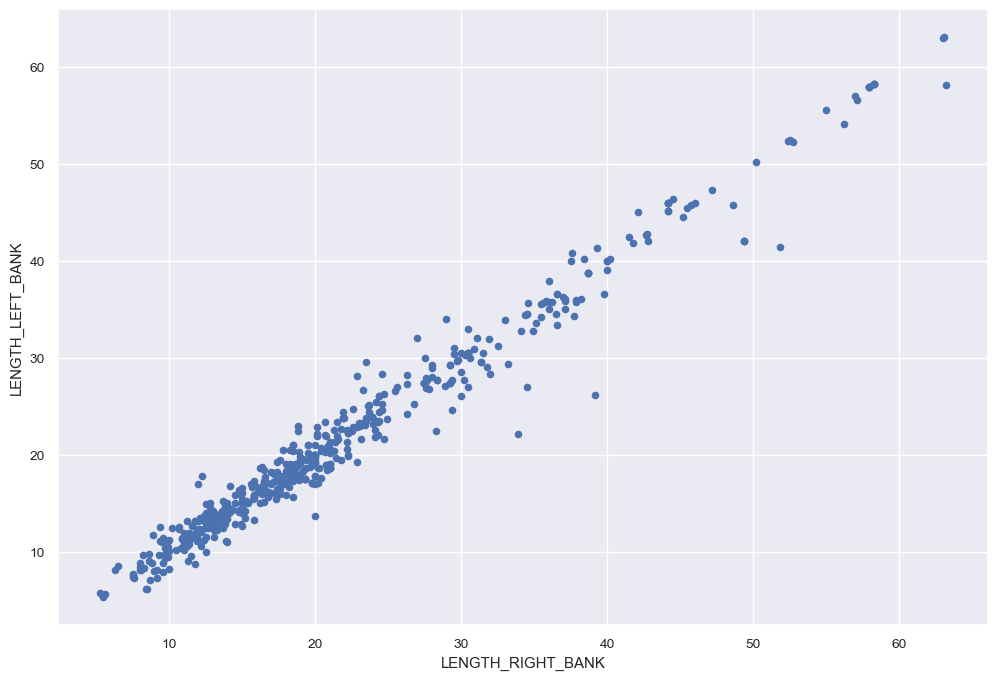

In [73]:
df_msite.plot(kind='scatter', x='LENGTH_RIGHT_BANK', y='LENGTH_LEFT_BANK', figsize=(12, 8));

### WIDTH_LOWER, WIDTH_MIDDLE, WIDTH_UPPER, FULL_WETTED_WIDTH

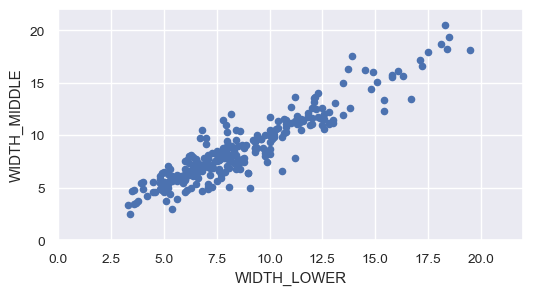

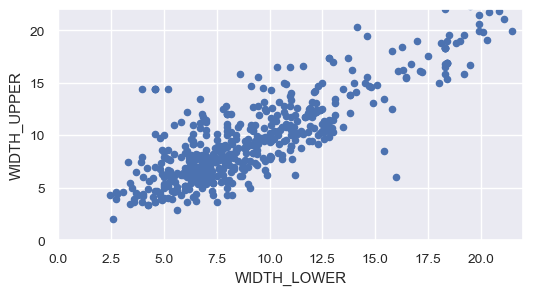

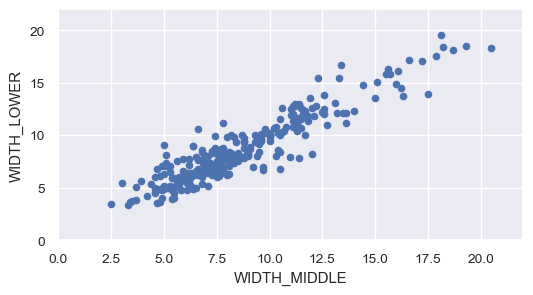

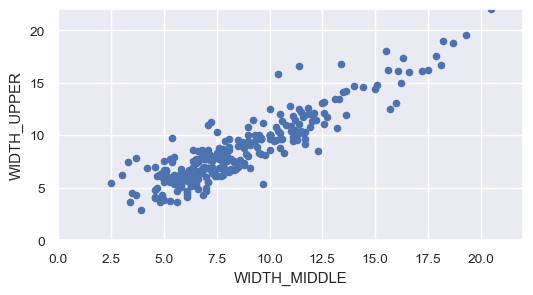

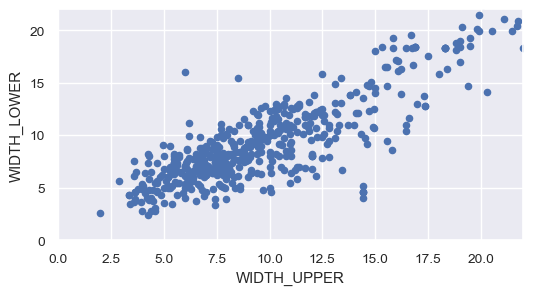

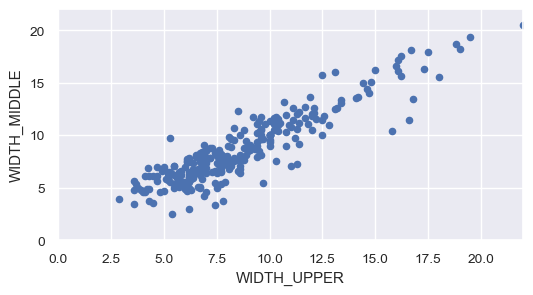

In [74]:
features = ['WIDTH_LOWER', 'WIDTH_MIDDLE', 'WIDTH_UPPER']
limits = (0, df_gsite[features].max().max())
for x, y in permutations(features, 2):
    if df_msite.dropna(subset=[x, y]).shape[0]:
        df_msite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
        plt.show()

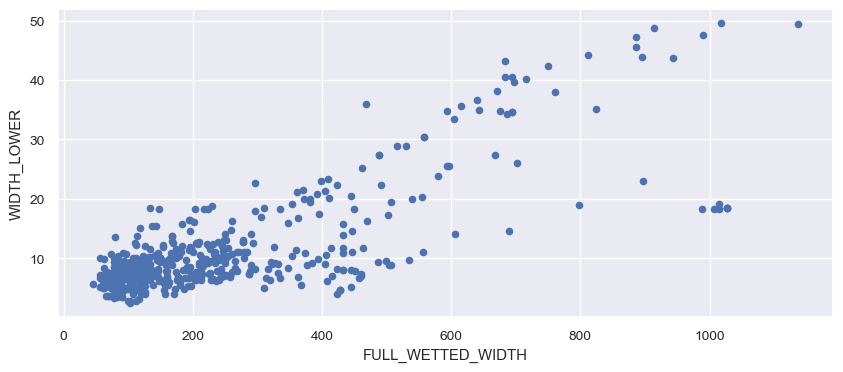

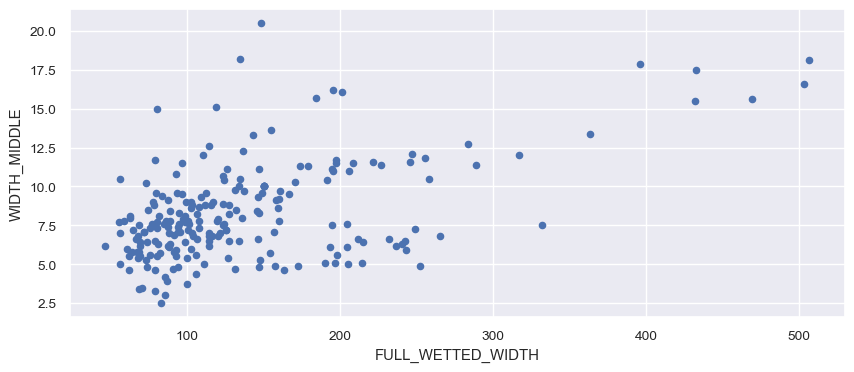

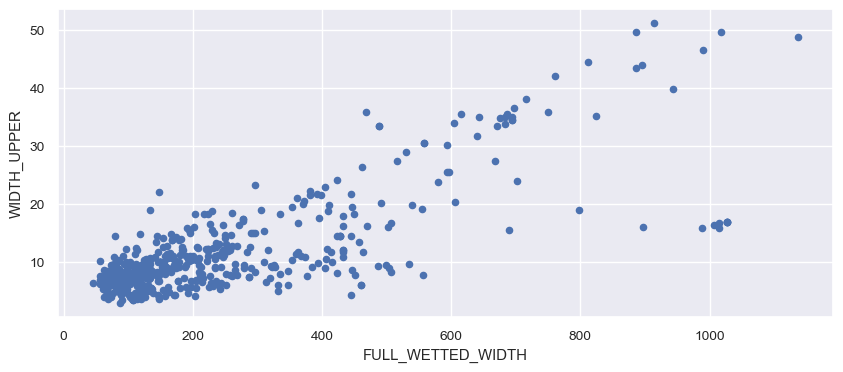

In [75]:
features = ['WIDTH_LOWER', 'WIDTH_MIDDLE', 'WIDTH_UPPER']
for y in features:
    if df_msite.dropna(subset=[x, y]).shape[0]:
        df_msite.plot(kind='scatter', x='FULL_WETTED_WIDTH', y=y, figsize=(10,4))
        plt.show()

In [76]:
# an interesting clump at ~(1000, 18)
df_msite[(df_msite.FULL_WETTED_WIDTH>950)&(df_msite.WIDTH_UPPER<20)]

,ID,SURVEY,SITE,CGNDB,SITE_EVENT_DATE,TOS1,TOS2,TOS3,TOS4,LENGTH_LEFT_BANK,LENGTH_RIGHT_BANK,WIDTH_LOWER,WIDTH_MIDDLE,WIDTH_UPPER,FULL_WETTED_WIDTH,DEPTHA1,DEPTHA2,DEPTHA3,DEPTHA4,DEPTHB1,DEPTHB2,DEPTHB3,DEPTHB4,DEPTHC1,DEPTHC2,DEPTHC3,DEPTHC4,DEPTH_MAX,DEPTH_LAYOUT_TYPE,AIR_TEMPERATURE,WATER_TEMPERATURE_ARRIVAL,WATER_TEMPERATURE_DEPART,TIME_TEMP1,WATER_TEMP1,TIME_TEMP2,WATER_TEMP2,TIME_TEMP3,WATER_TEMP3,GRADIENT_WATER_HEIGH_UP,GRADIENT_WATER_HEIGH_DOWN,GRADIENT_DISTANCE,WATER_VEL_TIME,WATER_VEL_DISTANCE,WATER_PH,WATER_CONDUCTIVITY,WATER_CONDUCTIVITY_RESOLUTION,SUB_TYPE_FINES,SUB_TYPE_SAND,SUB_TYPE_GRAVEL,SUB_TYPE_PEBBLE,SUB_TYPE_COBBLE,SUB_TYPE_ROCKS,SUB_TYPE_BOULDER,SUB_TYPE_BEDROCK,L_BK_OVERHANGING_VEG,R_BK_OVERHANGING_VEG,MAX_OVERHANG_L_BK,MAX_OVERHANG_R_BK,SWEEP0_TIME,SWEEP0_TEMP,SWEEP0_5_TIME,SWEEP0_5_TEMP,SWEEP1_TIME,SWEEP1_TEMP,SWEEP2_TIME,SWEEP2_TEMP,SWEEP3_TIME,SWEEP3_TEMP,SWEEP4_TIME,SWEEP4_TEMP,SWEEP5_TIME,SWEEP5_TEMP,SWEEP6_TIME,SWEEP6_TEMP,ELECTROFISHER_TYPE,ELECTROFISHER_CURRENT,ELECTROFISHER_FREQUENCY,ELECTROFISHER_VOLTAGE,ELECTROFISHER_OUTPUT,BARRIER_PRESENT,MESH_SIZE,BARRIER_COUNT,APRONSEINE,APRONSEINE_TYPE,SWEEP_COUNT,DEPTH_COUNT,WETTED_AREA,UNWETTED_AREA,WEATHER,CREW_PROBE,CREW_SEINE,CREW_DIPNET,CREW_BUCKET,CREW_RECORDER,CREW_OTHER1,CREW_OTHER2,CREW_OTHER3,CREW_OTHER4,CREW_OTHER5,REMARK,FLAG_R_BK_OVERHANGING_VEG,FLAG_MAX_OVERHANG_R_BK,FLAG_AIR_TEMPERATURE,FLAG_WATER_TEMPERATURE_ARRIVAL,FLAG_WATER_PH,FLAG_WATER_CONDUCTIVITY,FLAG_ELECTROFISHER_CURRENT,FLAG_ELECTROFISHER_VOLTAGE,outlier,outlier_TOS2,outlier_TOS4,outlier_LENGTH_LEFT_BANK,outlier_LENGTH_RIGHT_BANK,outlier_WIDTH_LOWER,outlier_WIDTH_MIDDLE,outlier_WIDTH_UPPER,outlier_FULL_WETTED_WIDTH,outlier_DEPTHA1,outlier_DEPTHA2,outlier_DEPTHA3,outlier_DEPTHB1,outlier_DEPTHB2,outlier_DEPTHB3,outlier_DEPTHC1,outlier_DEPTHC2,outlier_DEPTHC3,outlier_DEPTH_MAX,outlier_AIR_TEMPERATURE,outlier_WATER_TEMPERATURE_ARRIVAL,outlier_WATER_TEMP1,outlier_WATER_PH,outlier_WATER_CONDUCTIVITY,outlier_WATER_CONDUCTIVITY_RESOLUTION,outlier_SUB_TYPE_FINES,outlier_SUB_TYPE_SAND,outlier_SUB_TYPE_GRAVEL,outlier_SUB_TYPE_PEBBLE,outlier_SUB_TYPE_COBBLE,outlier_SUB_TYPE_ROCKS,outlier_SUB_TYPE_BOULDER,outlier_SUB_TYPE_BEDROCK,outlier_MAX_OVERHANG_L_BK,outlier_MAX_OVERHANG_R_BK,outlier_SWEEP0_5_TIME,outlier_SWEEP0_5_TEMP,outlier_SWEEP1_TIME,outlier_SWEEP1_TEMP,outlier_SWEEP2_TIME,outlier_SWEEP2_TEMP,outlier_SWEEP3_TIME,outlier_SWEEP3_TEMP,outlier_SWEEP4_TIME,outlier_SWEEP4_TEMP,outlier_SWEEP5_TIME,outlier_SWEEP5_TEMP,outlier_SWEEP6_TIME,outlier_SWEEP6_TEMP,outlier_ELECTROFISHER_CURRENT,outlier_ELECTROFISHER_VOLTAGE
23,24,1959,97,NaN,1959-08-12,NaN,NaN,NaN,NaN,58.27,58.27,18.40,NaN,16.87,1027.44,76.20,NaN,NaN,NaN,76.20,NaN,NaN,NaN,76.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800.00,21.11,1800.00,21.11,1800.00,21.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,high,high,NaN,NaN,NaN,high,high,NaN,NaN,high,NaN,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,32,1960,97,NaN,1960-08-05,NaN,NaN,NaN,NaN,58.27,58.27,18.40,NaN,16.87,1027.44,60.96,NaN,NaN,NaN,60.96,NaN,NaN,NaN,60.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.00,22.78,1200.00,22.78,1200.00,22.78,1200.00,22.78,1200.00,22.78,1200.00,22.78,NaN,NaN,2,NaN,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,overcast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,high,high,NaN,NaN,NaN,high,high,NaN,NaN,high,NaN,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# same clump in upper and lower plots
(df_msite[(df_msite.FULL_WETTED_WIDTH>950)&(df_msite.WIDTH_LOWER<20)].index == df_msite[(df_msite.FULL_WETTED_WIDTH>950)&(df_msite.WIDTH_UPPER<20)].index).all()

True

In [78]:
# no obvious data integrity issues
df_msite[(df_msite.FULL_WETTED_WIDTH>950)&(df_msite.WIDTH_LOWER<20)].iloc[:, 9:28].dropna(how='all', axis=1).fillna('').T

,23,31,39,52,70,84,91,131
LENGTH_LEFT_BANK,58.27,58.27,58.27,58.27,57.91,57.91,57.91,57.91
LENGTH_RIGHT_BANK,58.27,58.27,58.27,58.27,57.91,57.91,57.91,57.91
WIDTH_LOWER,18.40,18.40,18.40,18.40,18.29,18.29,18.29,19.20
WIDTH_UPPER,16.87,16.87,16.87,16.87,16.76,16.46,15.85,15.85
FULL_WETTED_WIDTH,1027.44,1027.44,1027.44,1027.44,1014.97,1006.14,988.49,1014.97
DEPTHA1,76.20,60.96,45.72,60.96,114.30,,25.40,45.72
DEPTHB1,76.20,60.96,45.72,60.96,114.30,,25.40,45.72
DEPTHC1,76.20,60.96,45.72,60.96,114.30,,25.40,45.72


### do all of the pebble rock sands add to 1?

In [79]:
# mostly
rock_columns = [x for x in df_msite.columns if 'SUB_TYPE' in x and 'outlier' not in x]
df_msite[rock_columns].dropna(how='all').sum(axis=1).describe()

count   258.00
mean     99.89
std       3.67
min      90.00
25%     100.00
50%     100.00
75%     100.00
max     145.00
dtype: float64

In [80]:
# these rows are incorrect (but all are relatively close)
pd.concat([
    df_msite.loc[(df_msite[rock_columns].sum(axis=1) != 100), rock_columns].dropna(how='all'),
    df_msite.loc[(df_msite[rock_columns].sum(axis=1) != 100), rock_columns].dropna(how='all').sum(axis=1)
], axis=1).rename({0: 'SUM_OF_ALL_SUB_TYPES'}, axis=1)

,SUB_TYPE_FINES,SUB_TYPE_SAND,SUB_TYPE_GRAVEL,SUB_TYPE_PEBBLE,SUB_TYPE_COBBLE,SUB_TYPE_ROCKS,SUB_TYPE_BOULDER,SUB_TYPE_BEDROCK,SUM_OF_ALL_SUB_TYPES
352,0.00,0.00,5.00,30.00,45.00,10.00,0.00,0.00,90.00
369,0.00,0.00,10.00,NaN,65.00,15.00,5.00,0.00,95.00
404,0.00,0.00,10.00,35.00,40.00,15.00,5.00,0.00,105.00
423,0.00,5.00,5.00,20.00,50.00,10.00,0.00,0.00,90.00
436,0.00,0.00,15.00,15.00,20.00,25.00,15.00,0.00,90.00
452,0.00,2.00,17.00,20.00,35.00,20.00,5.00,0.00,99.00
458,0.00,0.00,5.00,20.00,30.00,25.00,10.00,0.00,90.00
466,0.00,0.00,20.00,30.00,40.00,0.00,0.00,0.00,90.00
467,0.00,0.00,20.00,60.00,20.00,5.00,0.00,0.00,105.00
523,0.00,0.00,10.00,15.00,25.00,35.00,5.00,0.00,90.00
